## Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
Which variables are significant in predicting the price of a car.
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.


## Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

Dataset:  https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link

# Import Necessary Library

In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,OneHotEncoder
warnings.filterwarnings('ignore')

# Read Dataset

In [726]:
dt=pd.read_csv("E:\entri\DSML projects\ml\CarPrice_Assignment.csv")
df=pd.DataFrame(dt)
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [728]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [730]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [732]:
#tail
df.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

# Sanity Check of Data

In [735]:
#Shape
df.shape

(205, 26)

In [739]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [741]:
df["CarName"].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [743]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [745]:
df["CarName"].nunique()

147

In [747]:
# Extract brand and model
df=df.drop('car_ID',axis=1)
df[['Brand','Model']]=df['CarName'].str.split(' ',n=1,expand=True)
df.head()


symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   

     price        Brand         Model  
0  13495.0  alfa-romero        giulia  
1  16500.0  alfa-romero       stelvio  
2  16500.0  alfa-romero  Quadrifoglio  
3  13950.0         audi        100 ls  
4  17450.0         audi         100ls  

[5 rows x 27 columns]

In [749]:
df.shape

(205, 27)

In [751]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Brand',
       'Model'],
      dtype='object')

In [753]:
df["Brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [755]:
df["Brand"].value_counts()

Brand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [757]:
print(df['Brand'].nunique())

28


In [759]:
# Define a mapping dictionary for correcting brand names
brand_mapping = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

# Apply the mapping to the 'brand' column
df['Brand'] = df['Brand'].replace(brand_mapping)


In [761]:
# Verify the changes
print(df['Brand'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [763]:
print(df['Brand'].nunique())

22


In [765]:
print(df["Brand"].value_counts())

Brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64


In [767]:
df=df.drop('CarName', axis=1)

In [769]:
#Finding Missing Values
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Brand               0
Model               2
dtype: int64

No null values found.

In [771]:
#For Finding The Percentage of Missing Value
df.isnull().sum()/df.shape[0]*100

symboling           0.00000
fueltype            0.00000
aspiration          0.00000
doornumber          0.00000
carbody             0.00000
drivewheel          0.00000
enginelocation      0.00000
wheelbase           0.00000
carlength           0.00000
carwidth            0.00000
carheight           0.00000
curbweight          0.00000
enginetype          0.00000
cylindernumber      0.00000
enginesize          0.00000
fuelsystem          0.00000
boreratio           0.00000
stroke              0.00000
compressionratio    0.00000
horsepower          0.00000
peakrpm             0.00000
citympg             0.00000
highwaympg          0.00000
price               0.00000
Brand               0.00000
Model               0.97561
dtype: float64

In [773]:
#Finding Duplicates 
df.duplicated().sum()

0

no duplicates found.

In [775]:
df.drop_duplicates(inplace=True) # drop duplicates and update df
df.duplicated().sum() # show duplicate count

0

In [777]:
#Identifying Garbage Value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

fueltype
gas       185
diesel     20
Name: count, dtype: int64
******************************
aspiration
std      168
turbo     37
Name: count, dtype: int64
******************************
doornumber
four    115
two      90
Name: count, dtype: int64
******************************
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
******************************
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
******************************
enginelocation
front    202
rear       3
Name: count, dtype: int64
******************************
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
******************************
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64
******************************
fuelsystem
mpfi    94
2bbl    66
idi 

In [781]:
# No garbage values

# Exploratory Data Analysis

In [783]:
#Descriptive Statistics
df.describe()  #Numerical Column


symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [785]:
df.describe(include="object")

fueltype aspiration doornumber carbody drivewheel enginelocation  \
count       205        205        205     205        205            205   
unique        2          2          2       5          3              2   
top         gas        std       four   sedan        fwd          front   
freq        185        168        115      96        120            202   

       enginetype cylindernumber fuelsystem   Brand    Model  
count         205            205        205     205      203  
unique          7              7          8      22      141  
top           ohc           four       mpfi  toyota  corolla  
freq          148            159         94      32        6

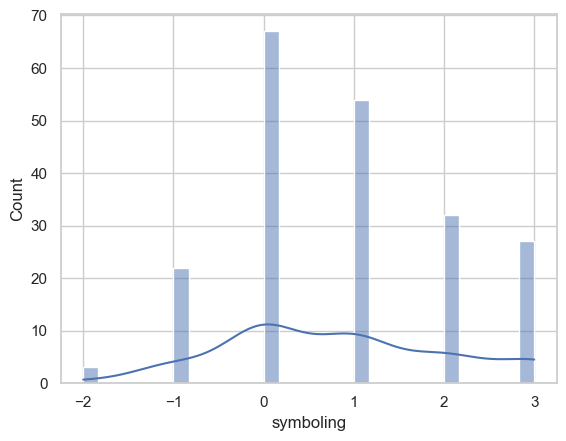

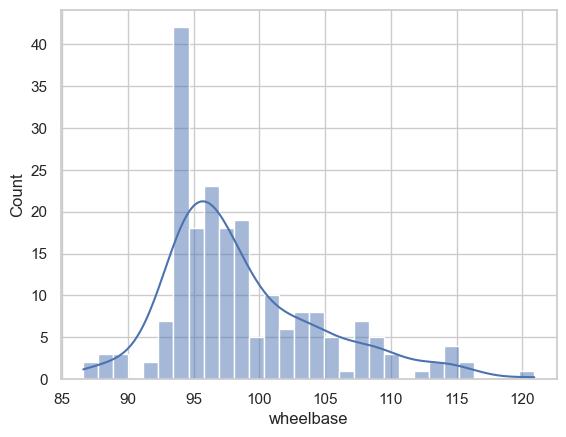

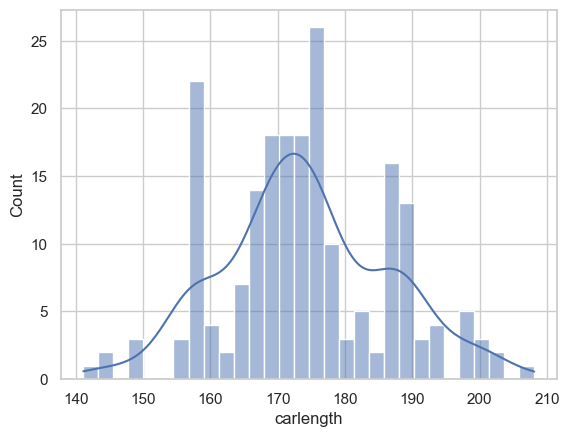

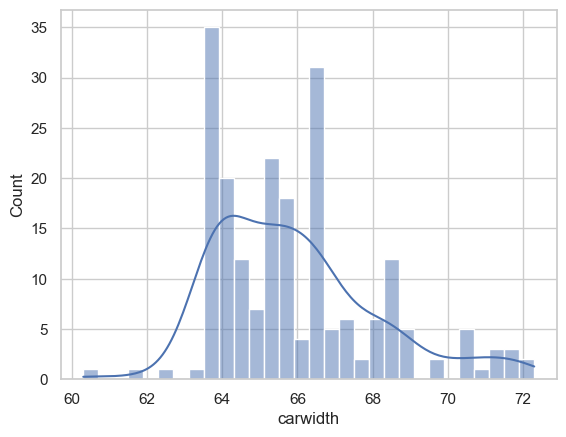

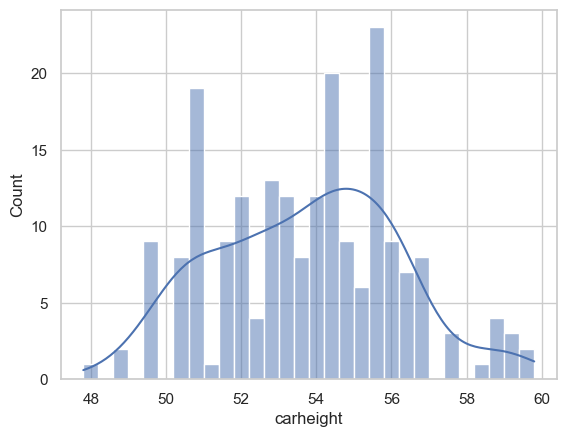

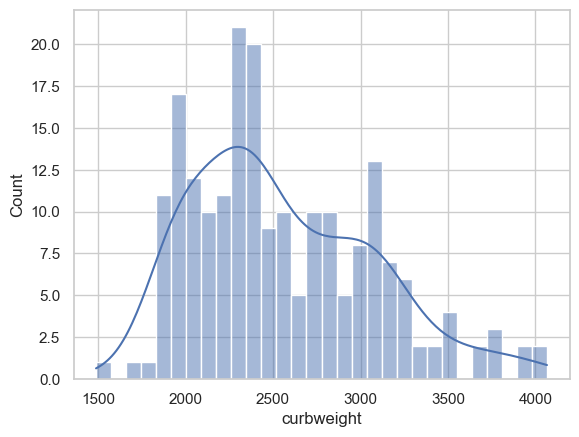

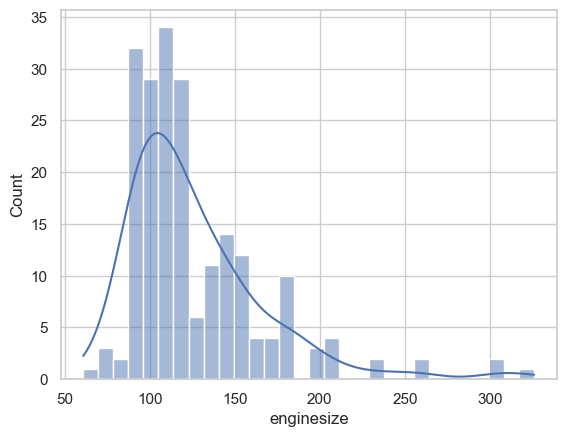

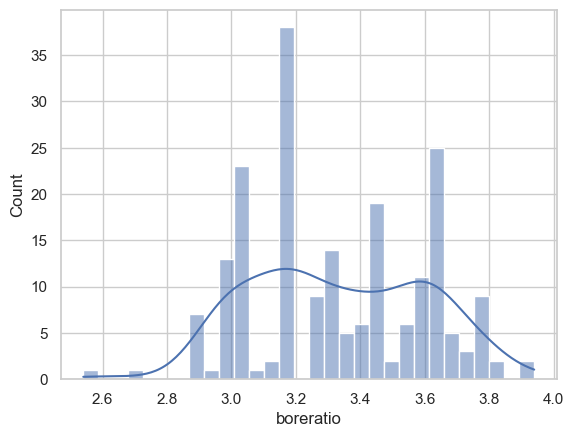

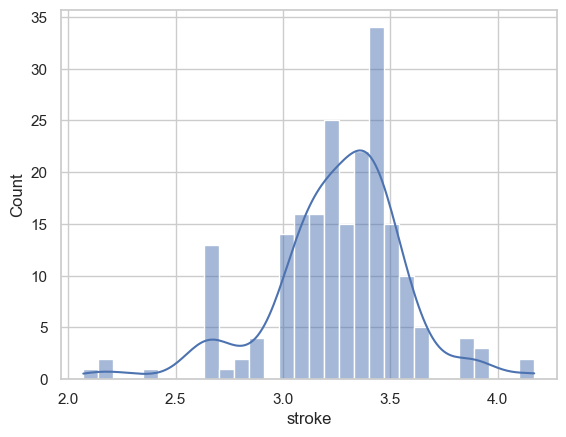

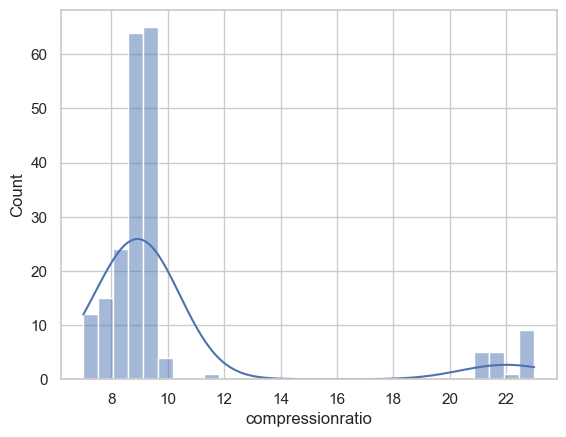

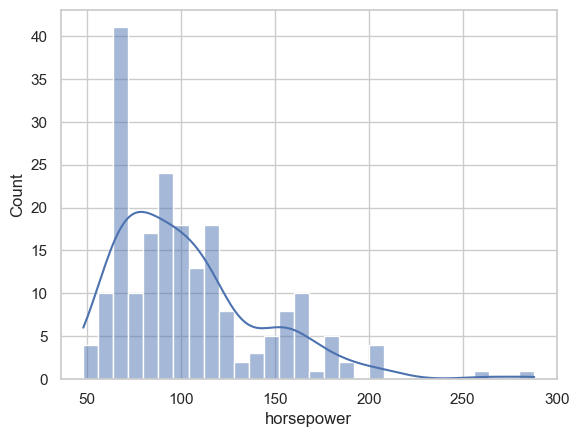

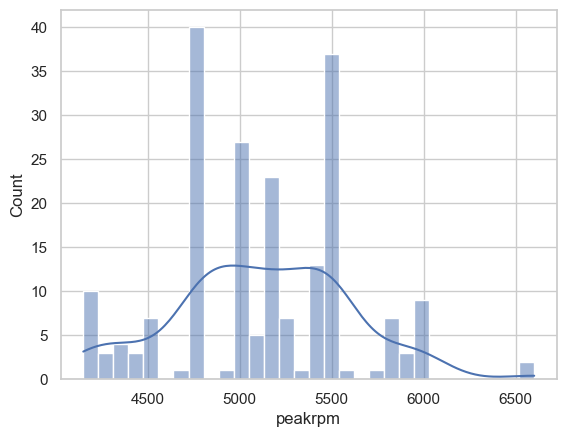

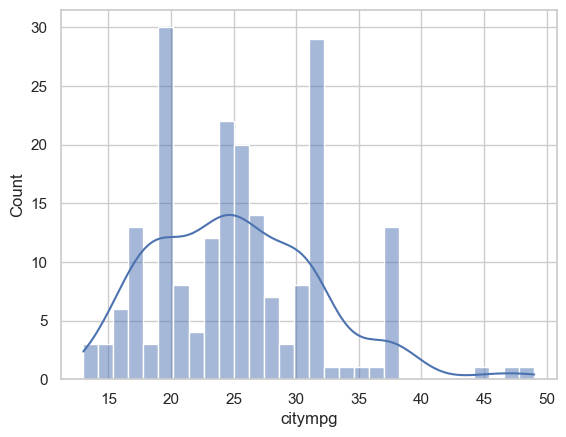

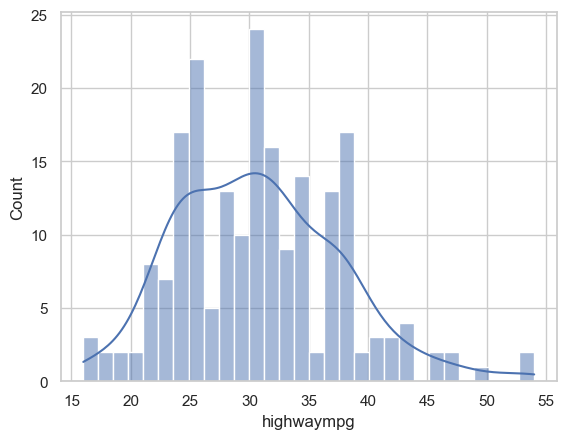

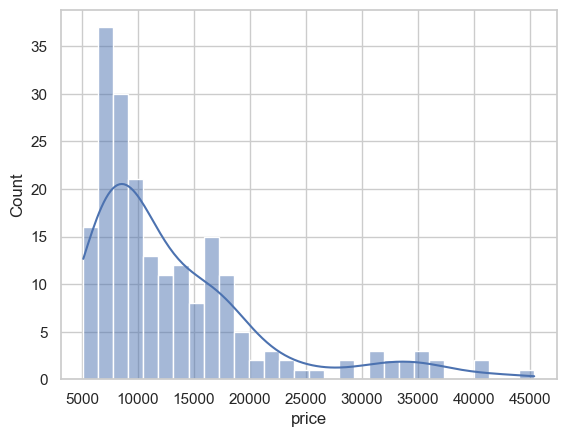

In [788]:
#Histogram to understand the distribution 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>],
       [<Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>],
       [<Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

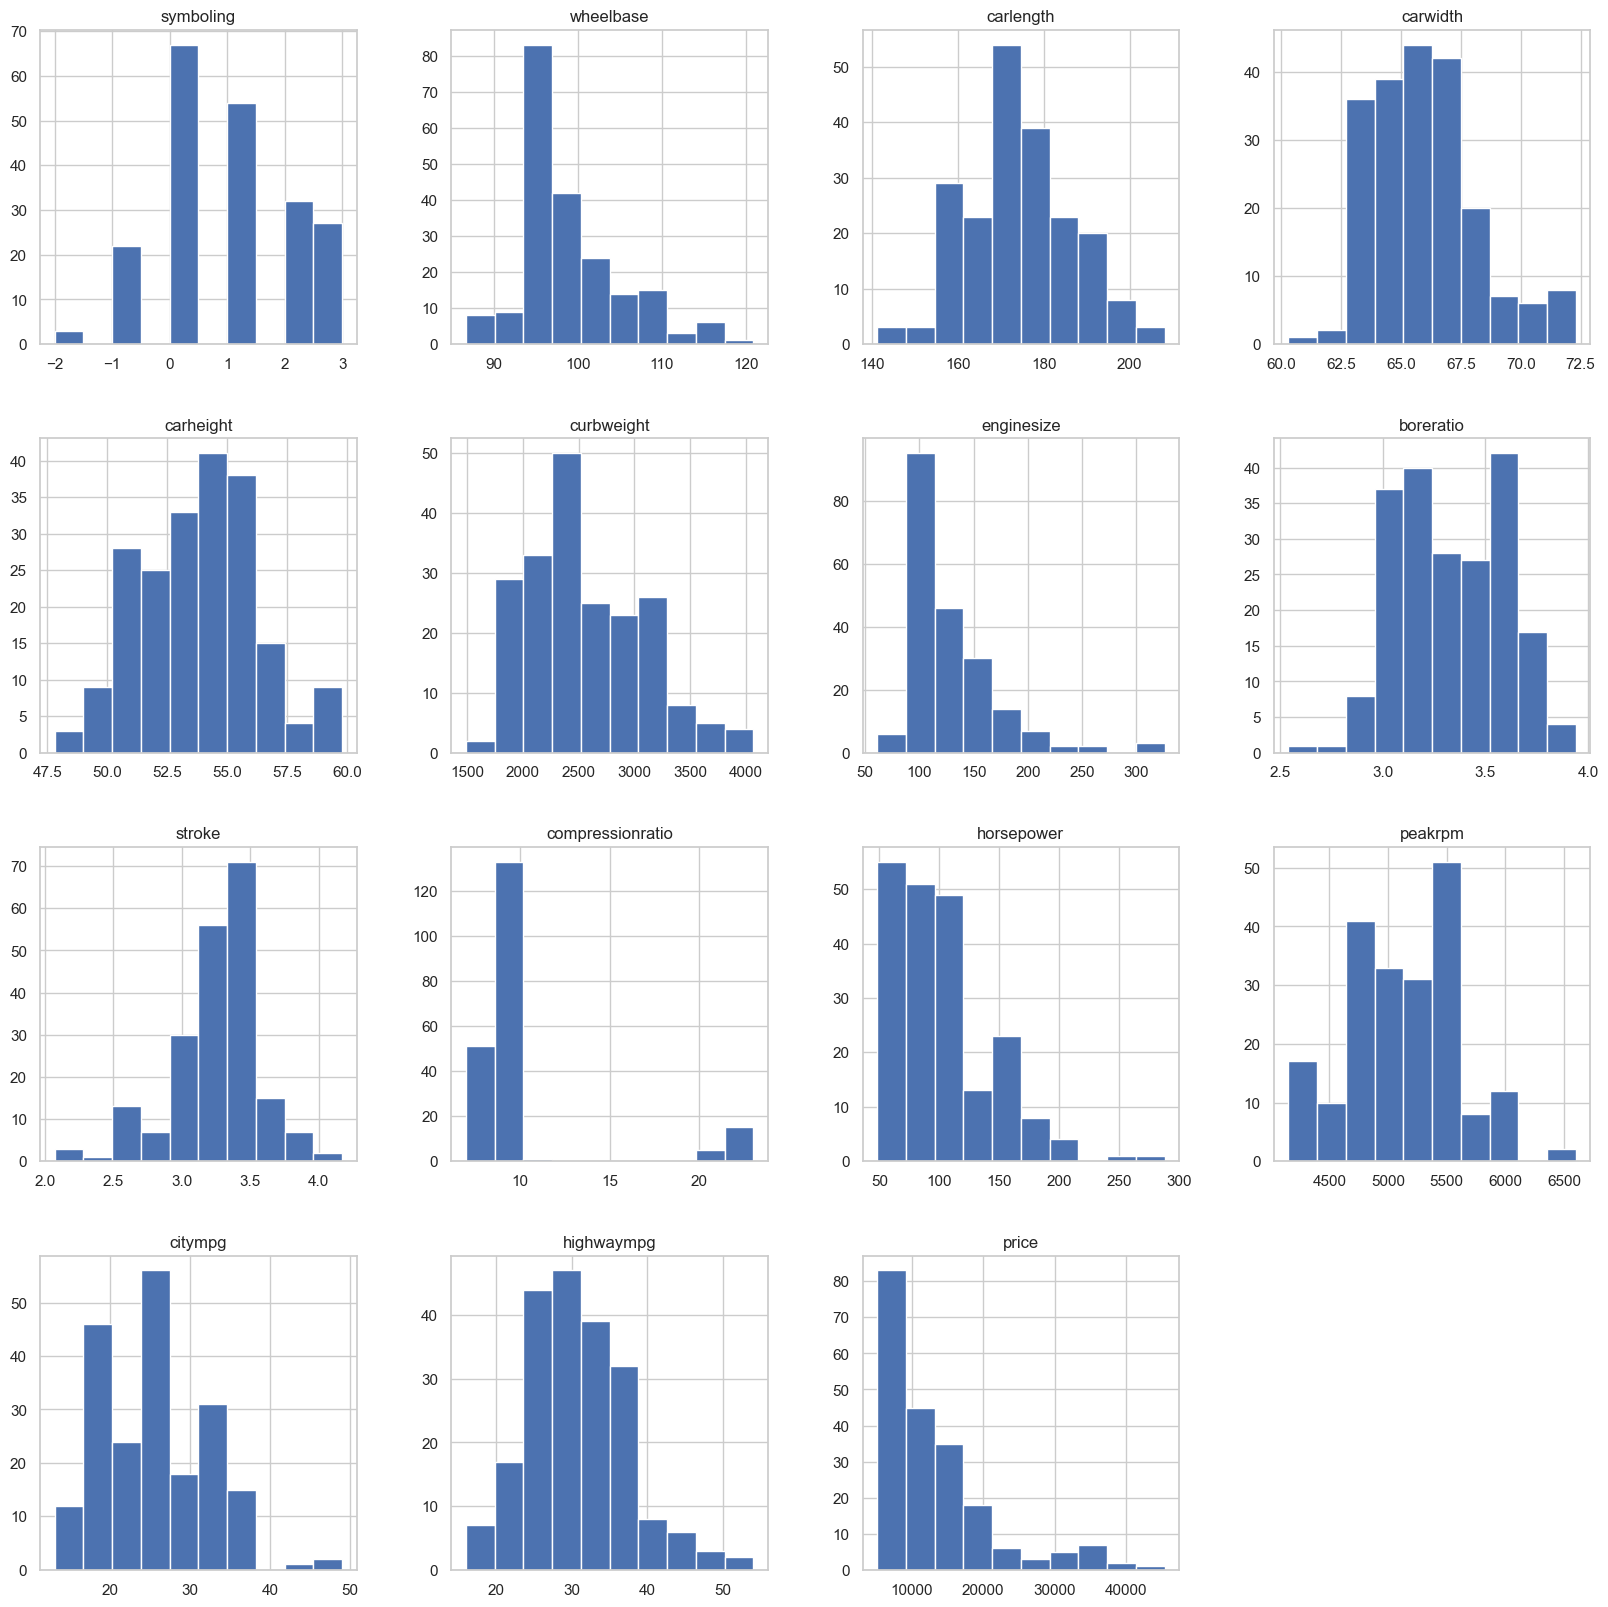

In [790]:
df.hist(figsize = (20,20))

In [792]:
df.select_dtypes(include="number").columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

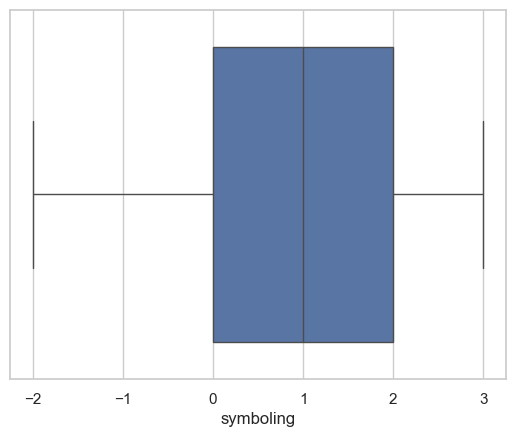

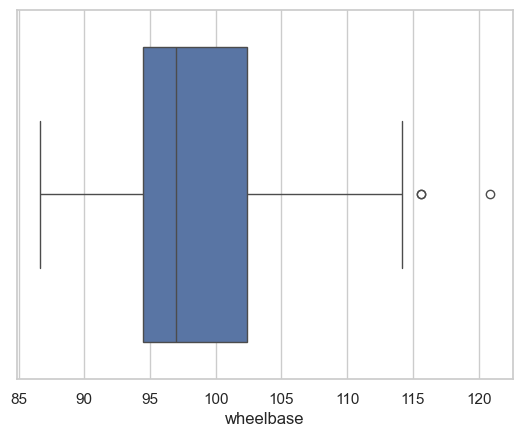

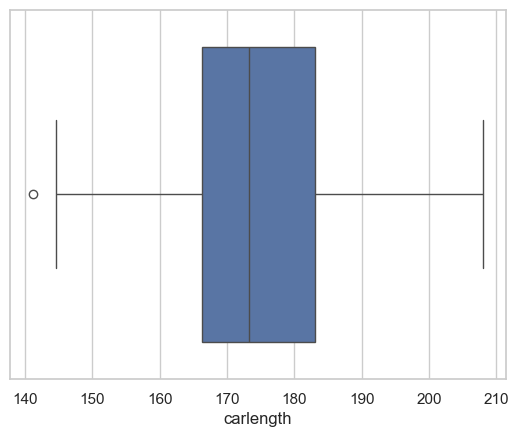

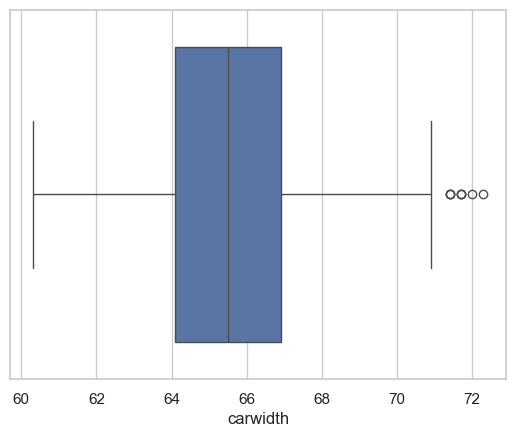

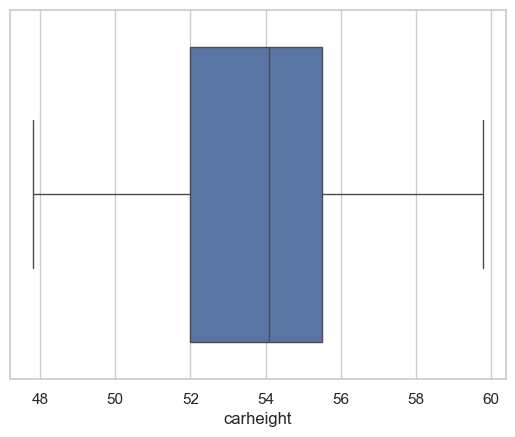

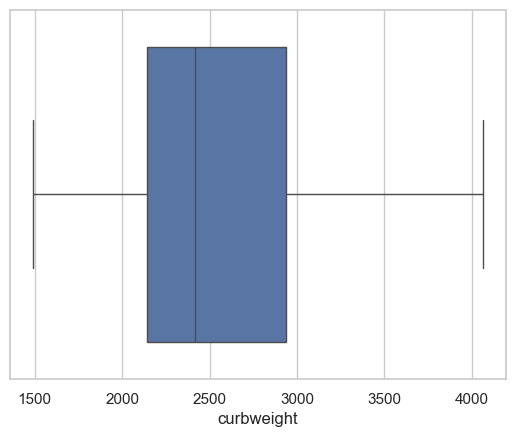

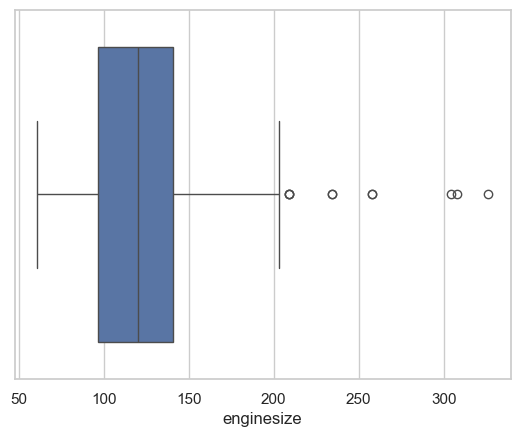

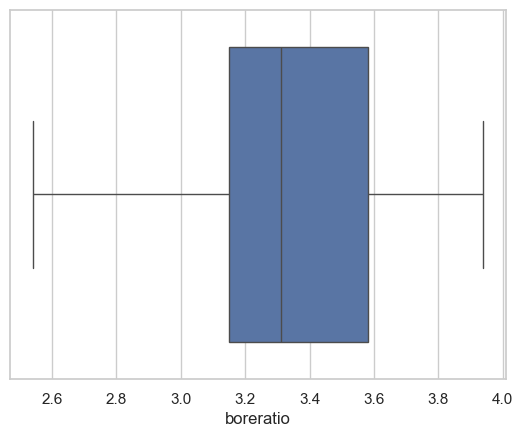

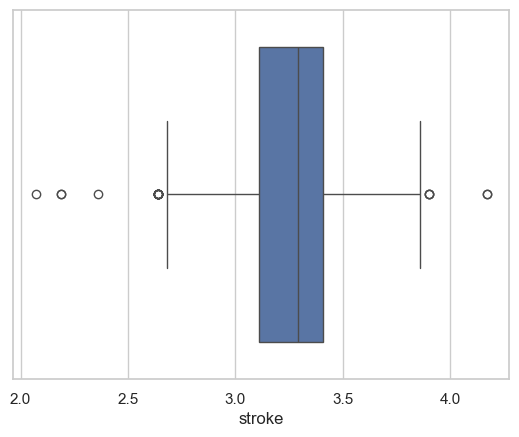

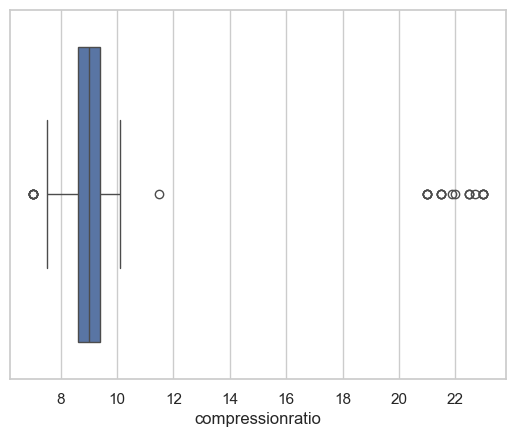

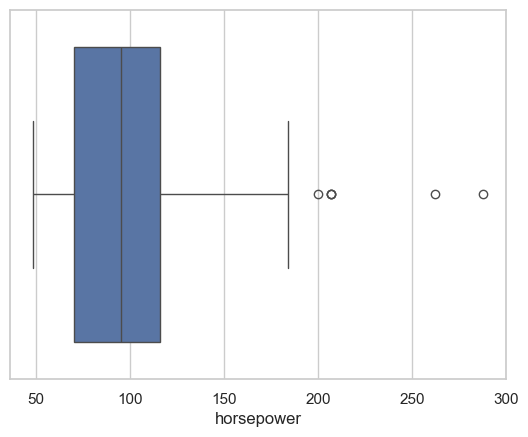

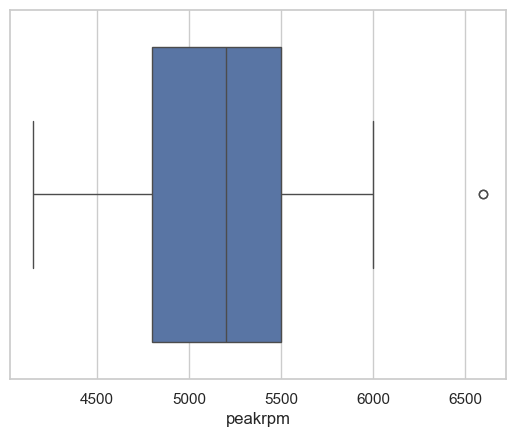

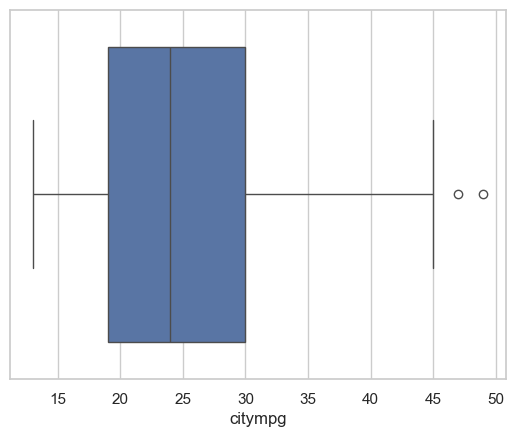

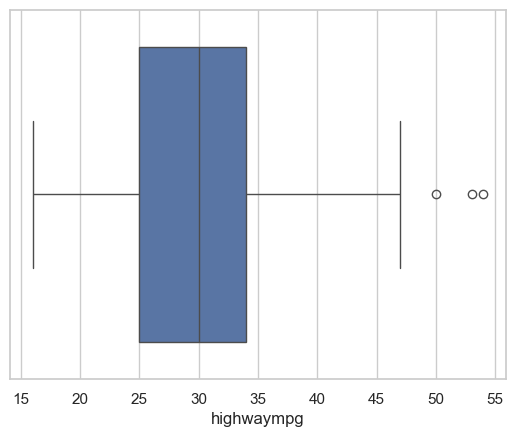

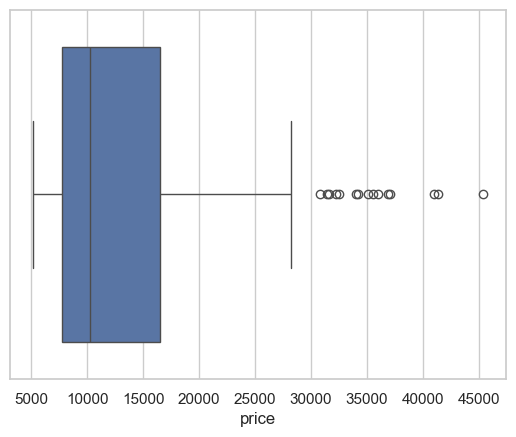

In [794]:
#Boxplot to understand the ouliers 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

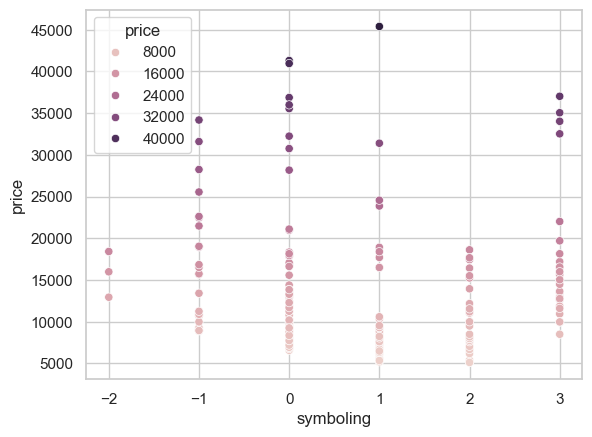

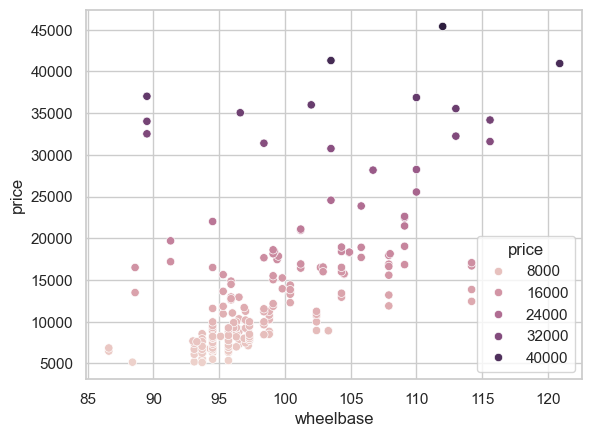

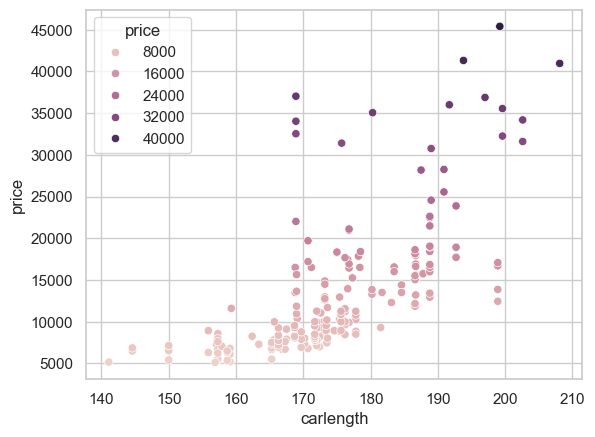

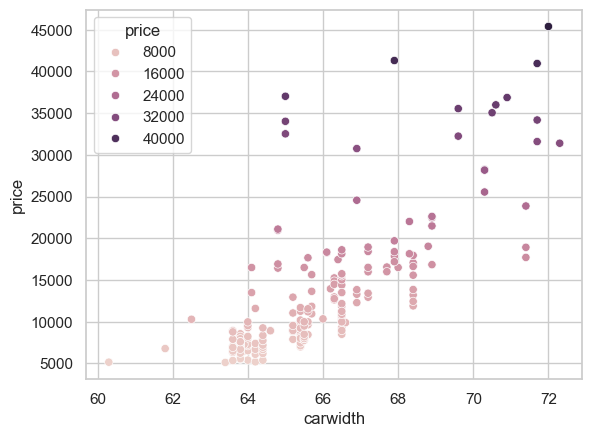

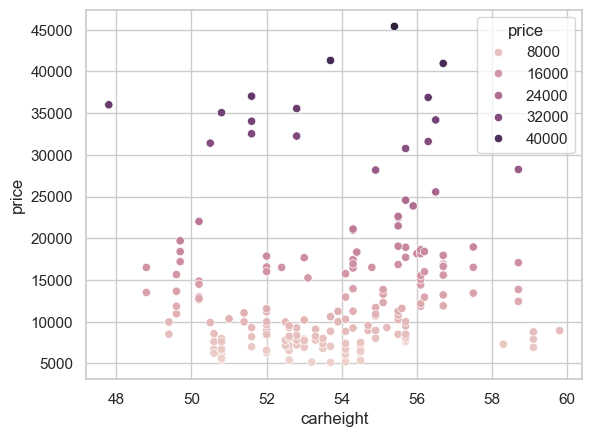

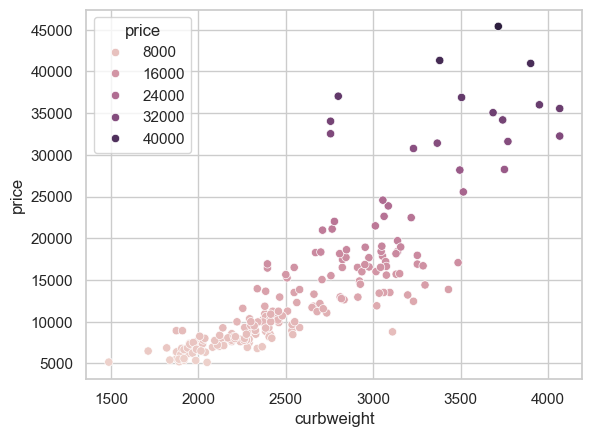

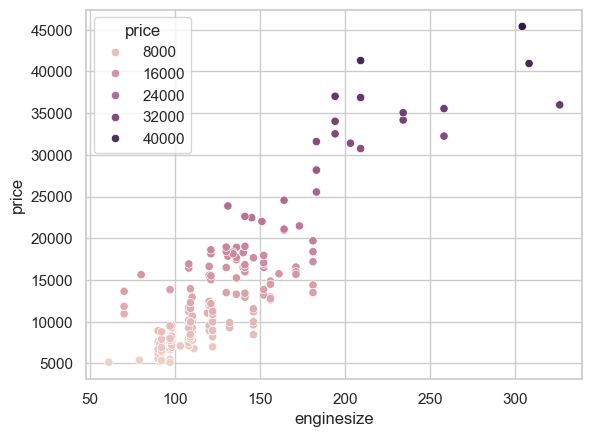

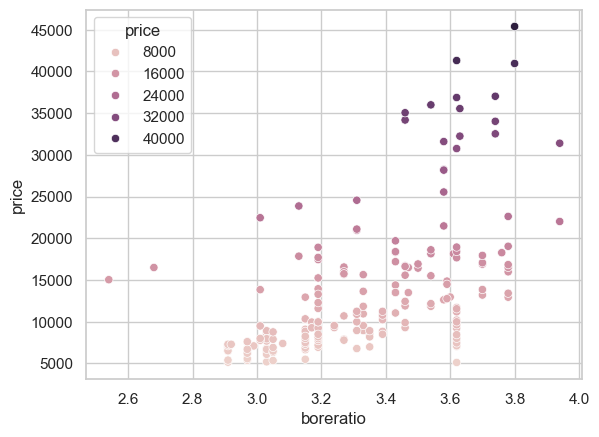

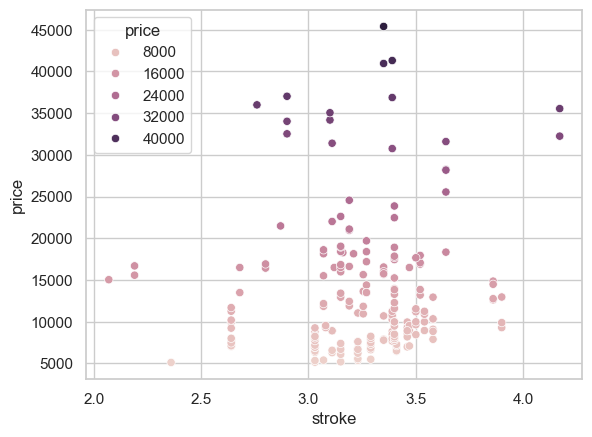

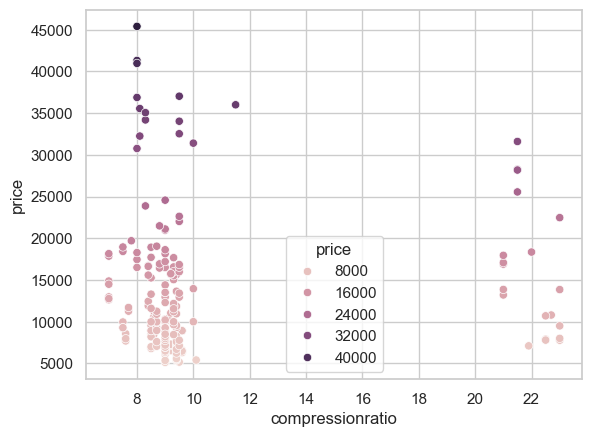

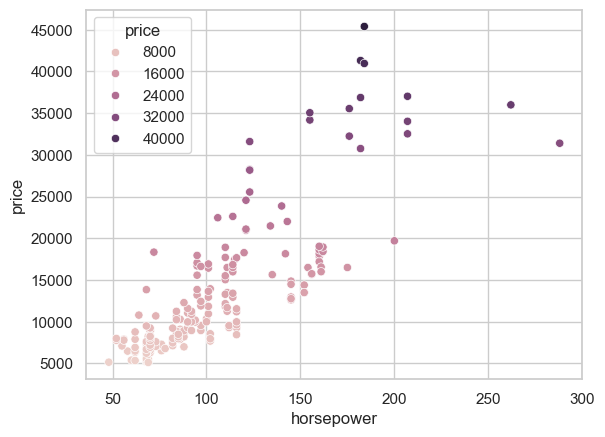

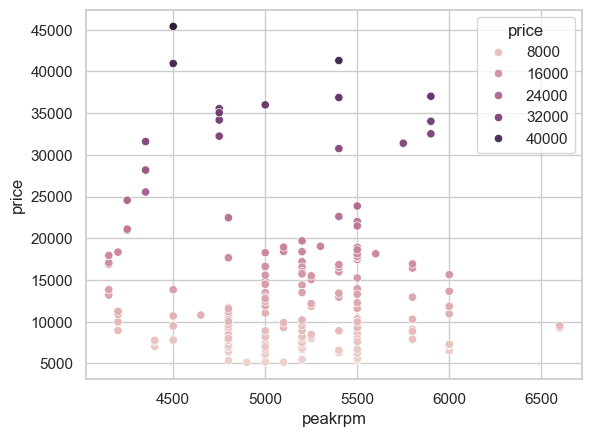

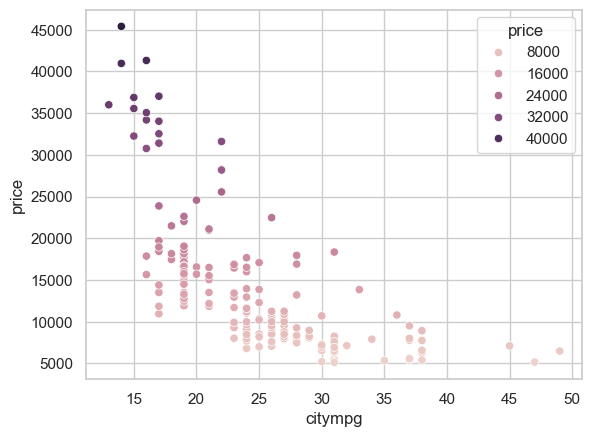

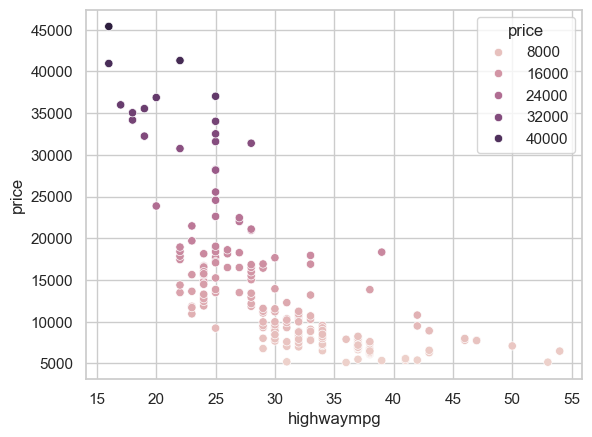

In [796]:
#Scatter Plot to understand the relationships
for i in ['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']:
   sns.scatterplot(data=df,x=i,y='price',hue='price')
   plt.show()
    

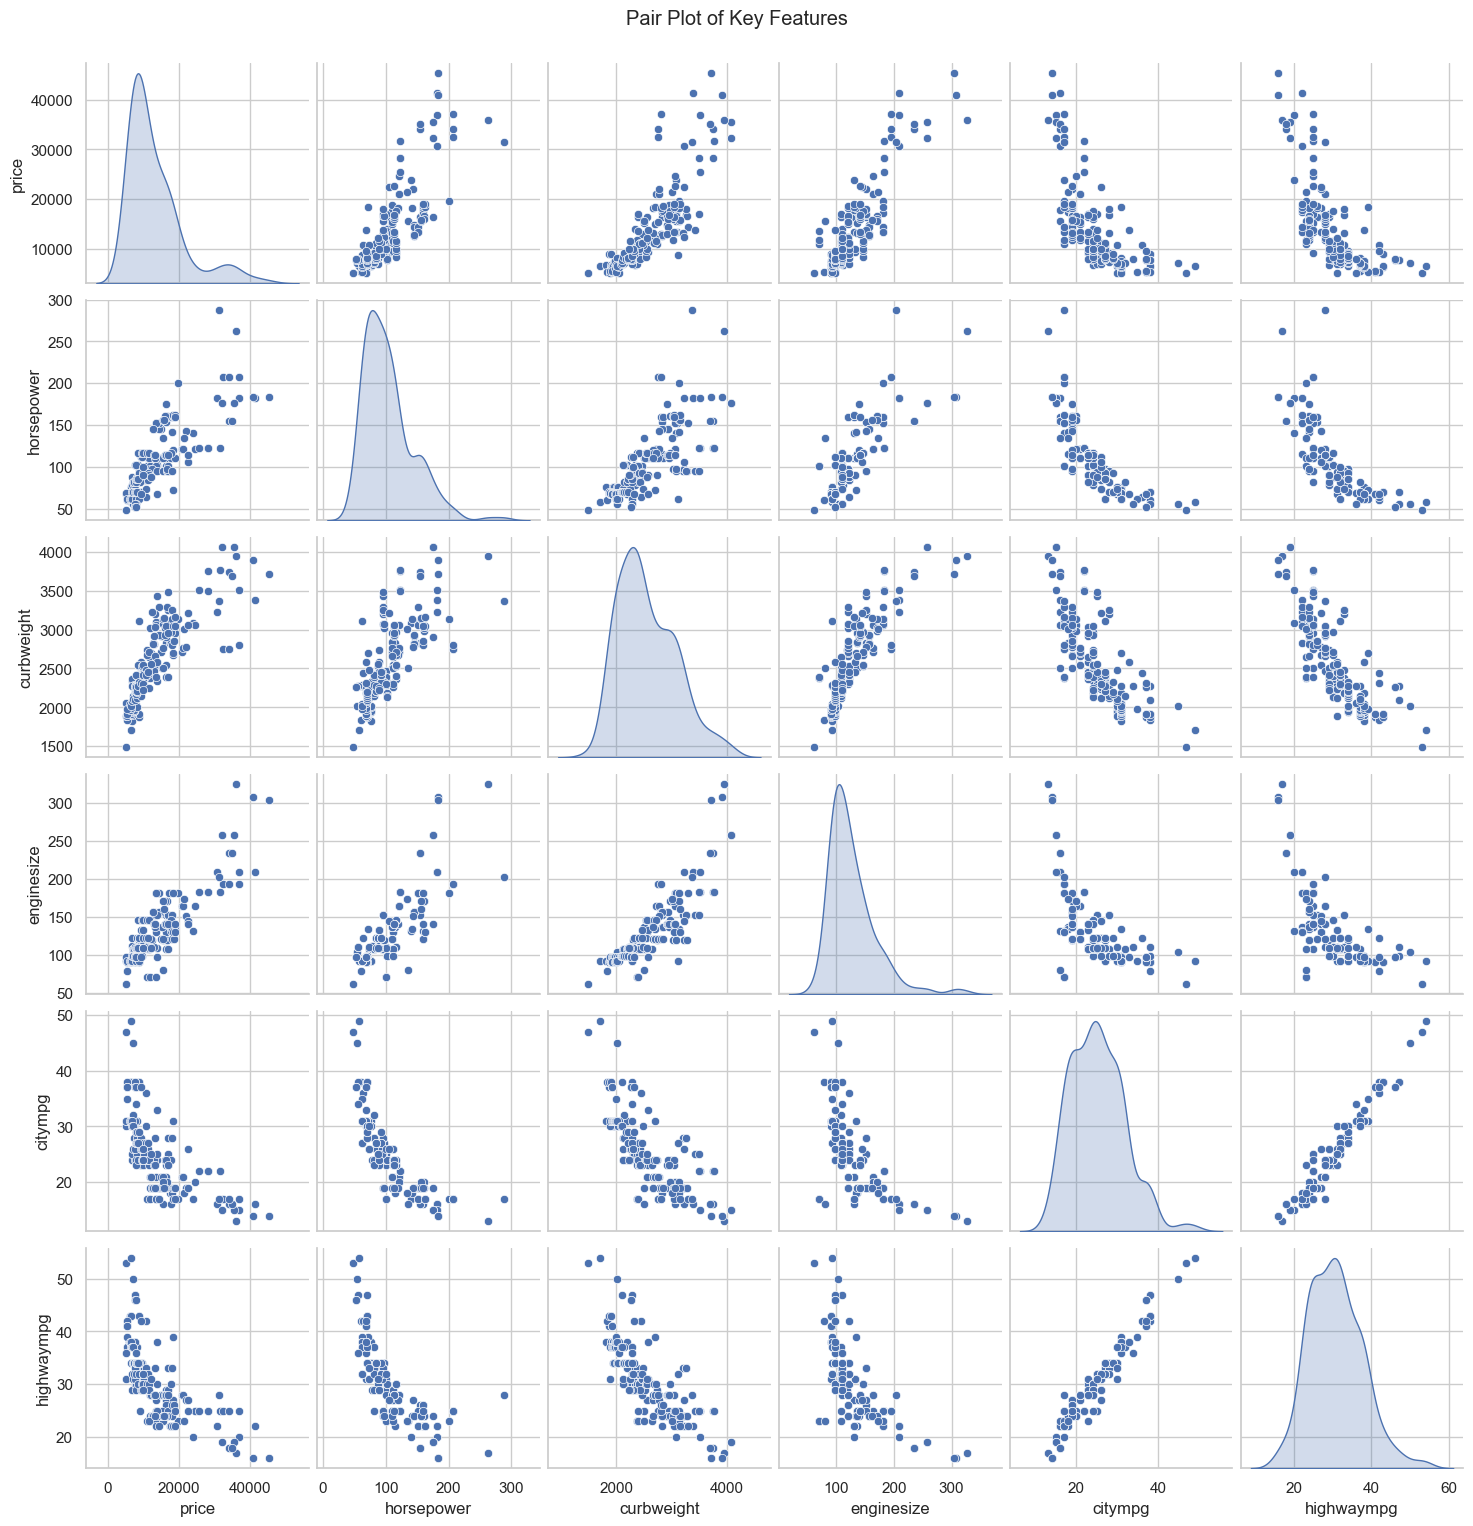

In [800]:
# Pair plot to examine relationships between features and 'price'
important_features = ['price', 'horsepower', 'curbweight', 'enginesize', 'citympg', 'highwaympg']
sns.pairplot(df[important_features], diag_kind="kde")
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


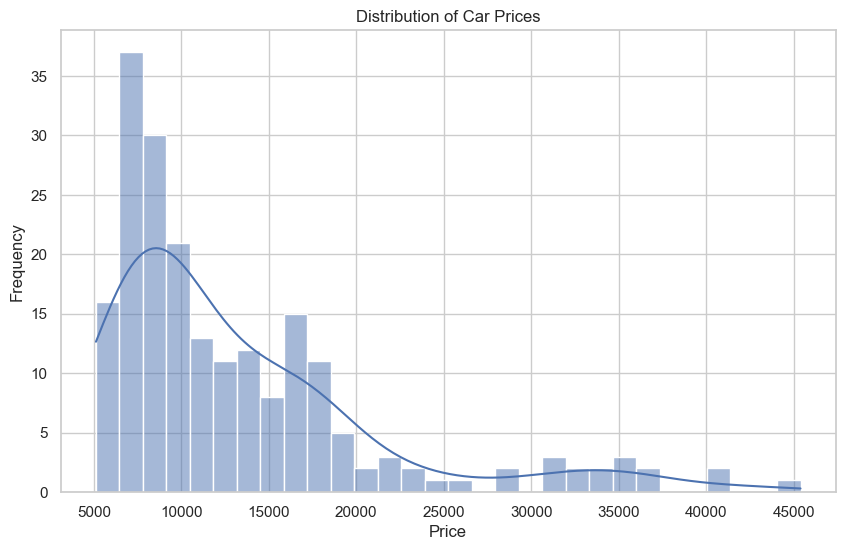

In [802]:
# Set plot style
sns.set(style="whitegrid")

# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


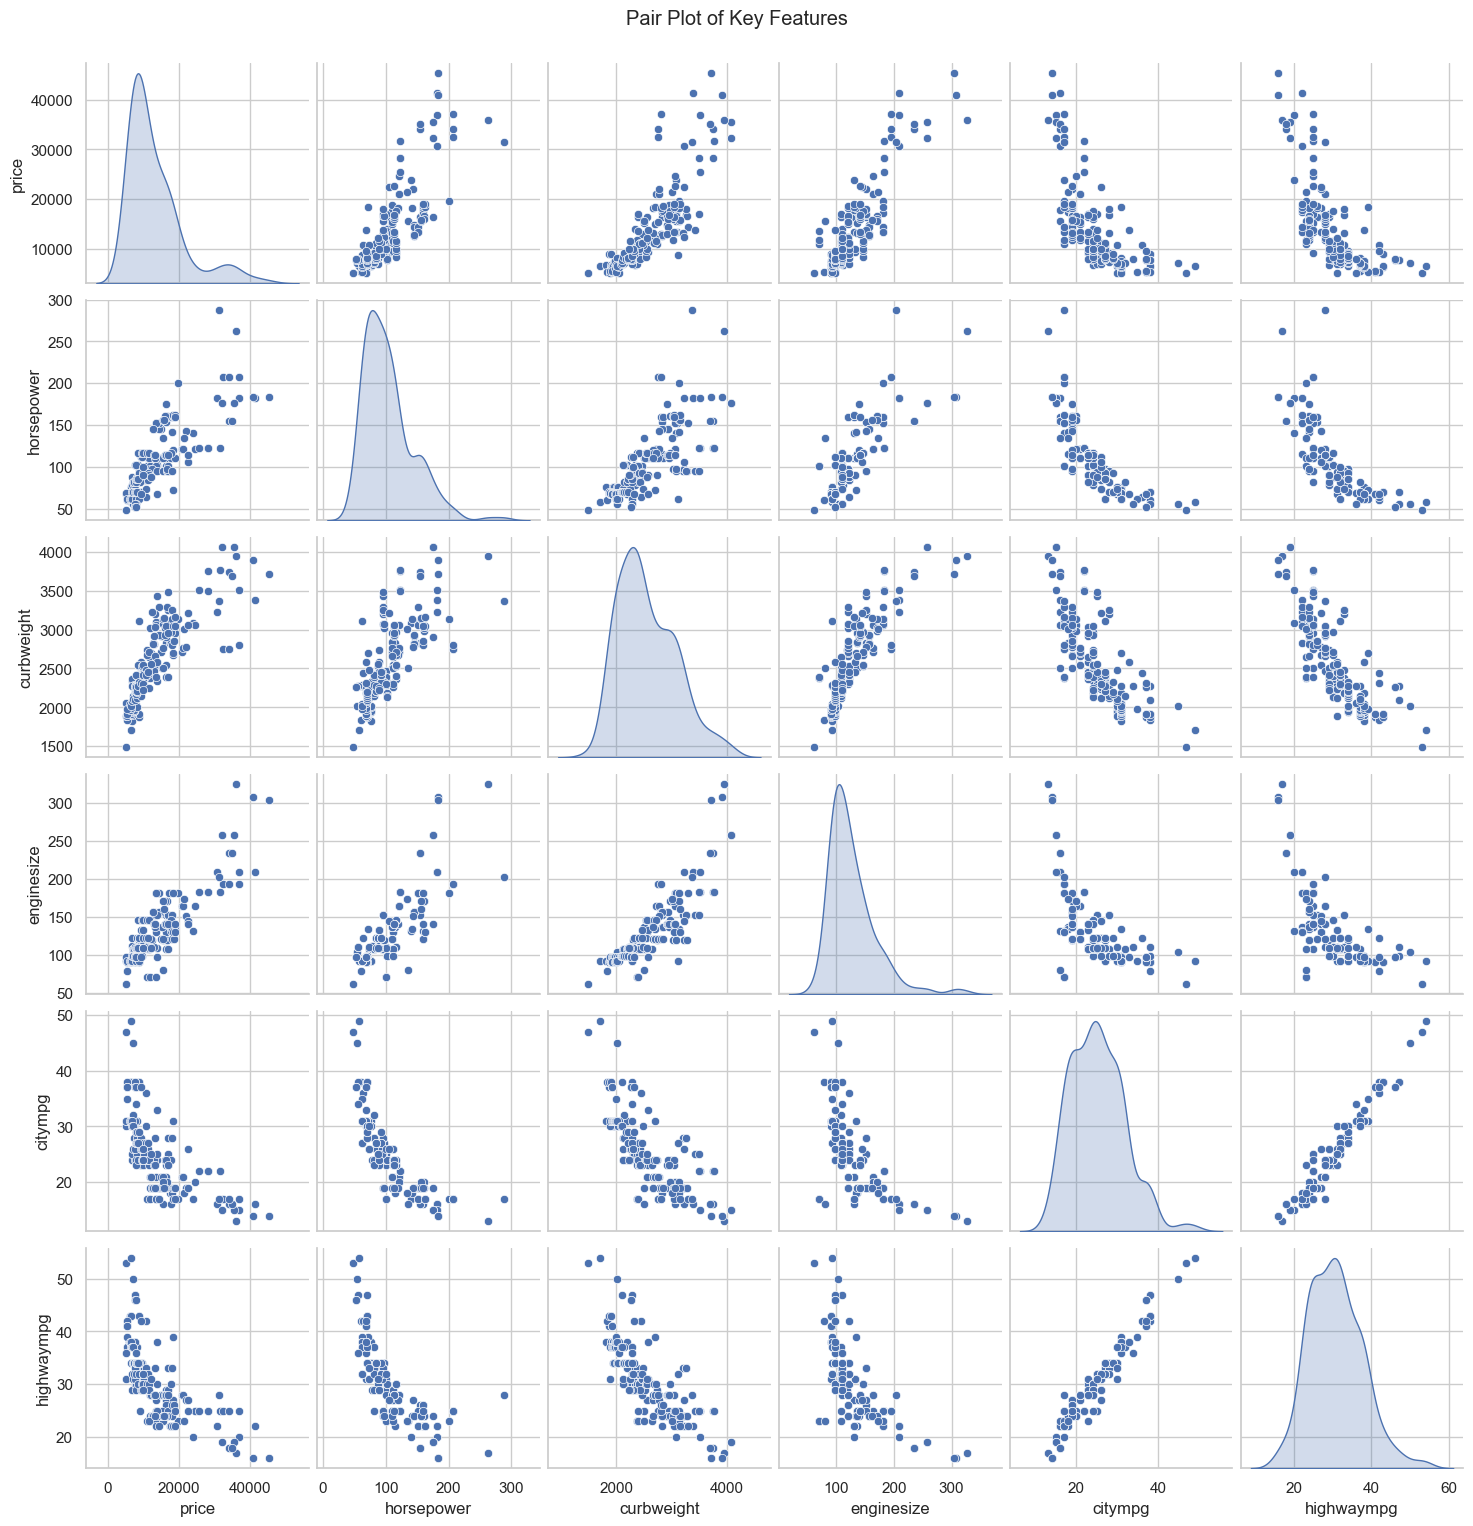

In [804]:
# Pair plot to examine relationships between features and 'price'
important_features = ['price', 'horsepower', 'curbweight', 'enginesize', 'citympg', 'highwaympg']
sns.pairplot(df[important_features], diag_kind="kde")
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


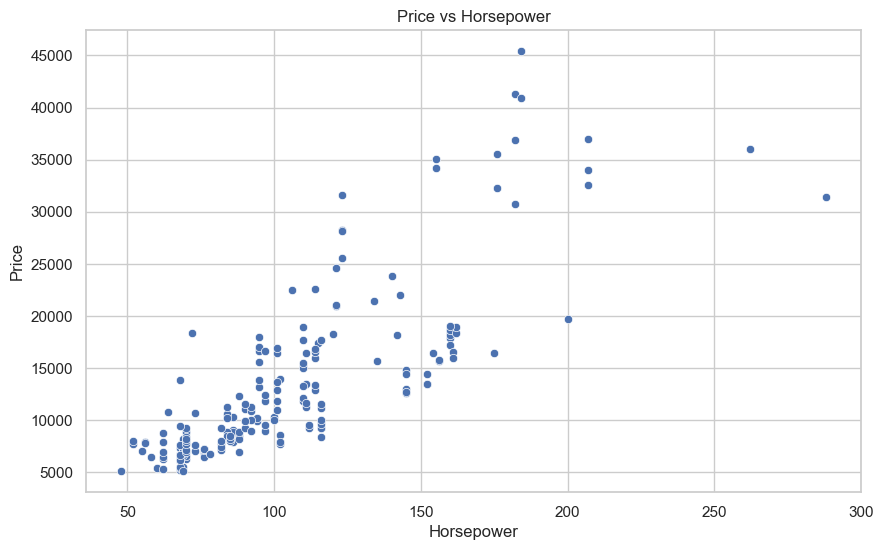

In [806]:
# Scatter plot: Price vs Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title("Price vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

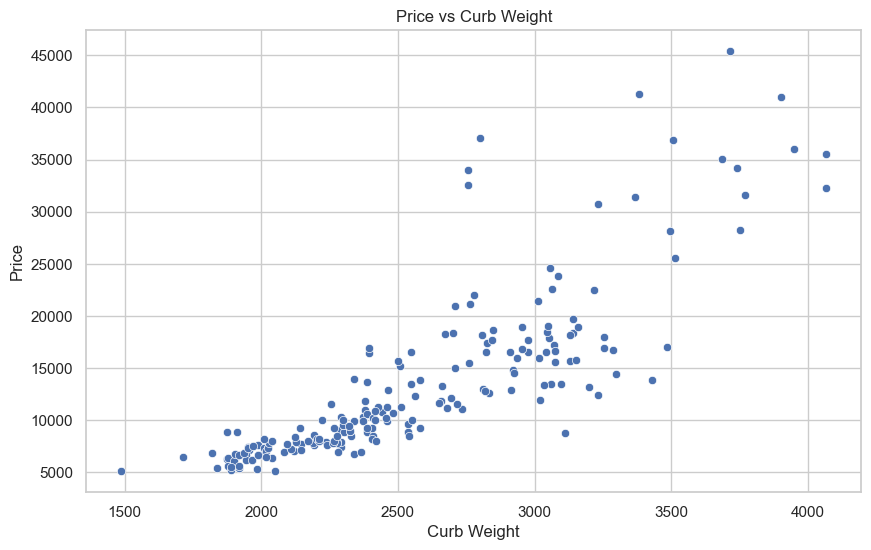

In [808]:
# Scatter plot: Price vs Curb Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='curbweight', y='price', data=df)
plt.title("Price vs Curb Weight")
plt.xlabel("Curb Weight")
plt.ylabel("Price")
plt.show()


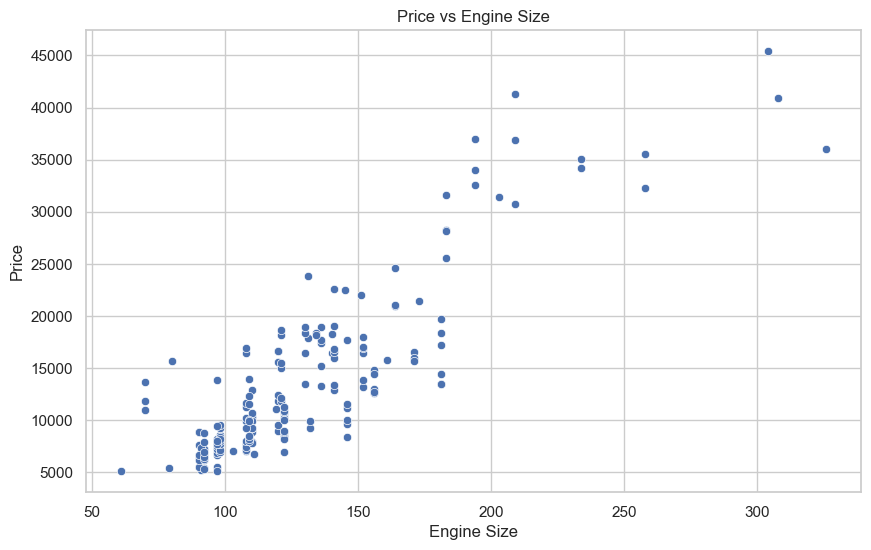

In [810]:
# Scatter plot: Price vs Engine Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='enginesize', y='price', data=df)
plt.title("Price vs Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

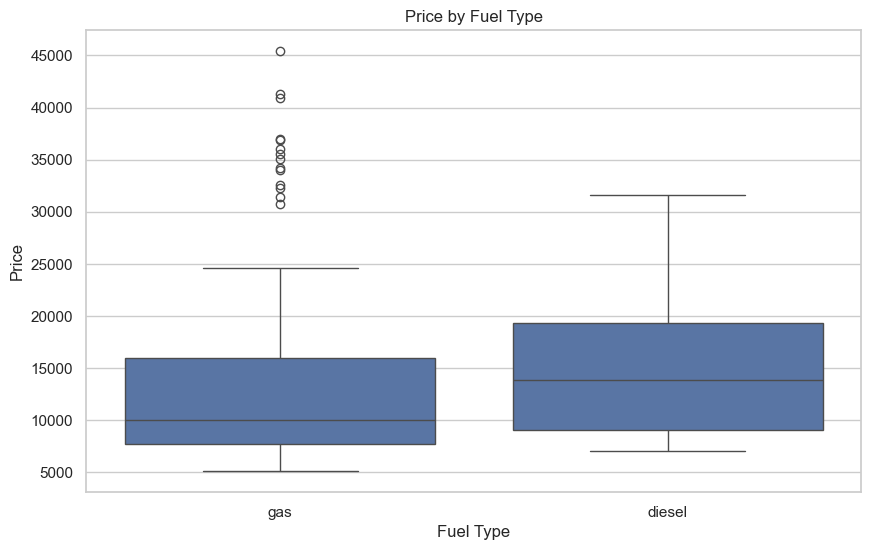

In [812]:
# Box plot: Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fueltype', y='price', data=df)
plt.title("Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

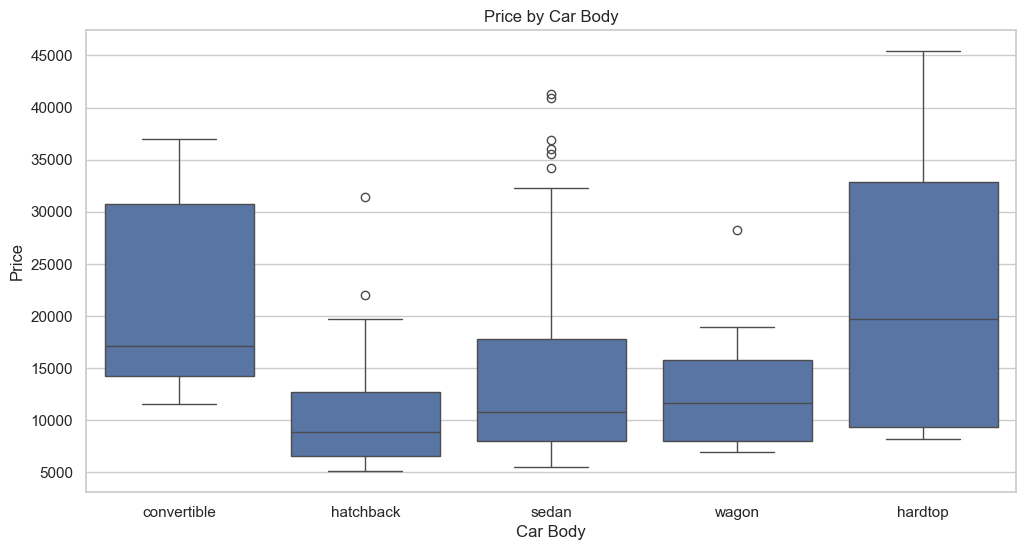

In [814]:
# Box plot: Price by Car Body
plt.figure(figsize=(12, 6))
sns.boxplot(x='carbody', y='price', data=df)
plt.title("Price by Car Body")
plt.xlabel("Car Body")
plt.ylabel("Price")
plt.show()


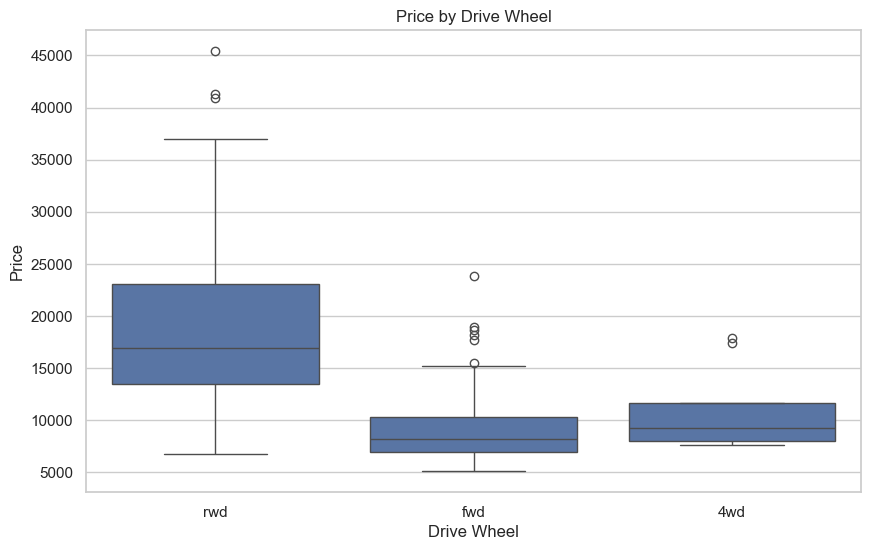

In [816]:
# Box plot: Price by Drive Wheel
plt.figure(figsize=(10, 6))
sns.boxplot(x='drivewheel', y='price', data=df)
plt.title("Price by Drive Wheel")
plt.xlabel("Drive Wheel")
plt.ylabel("Price")
plt.show()


In [829]:
df.select_dtypes(include="number").columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

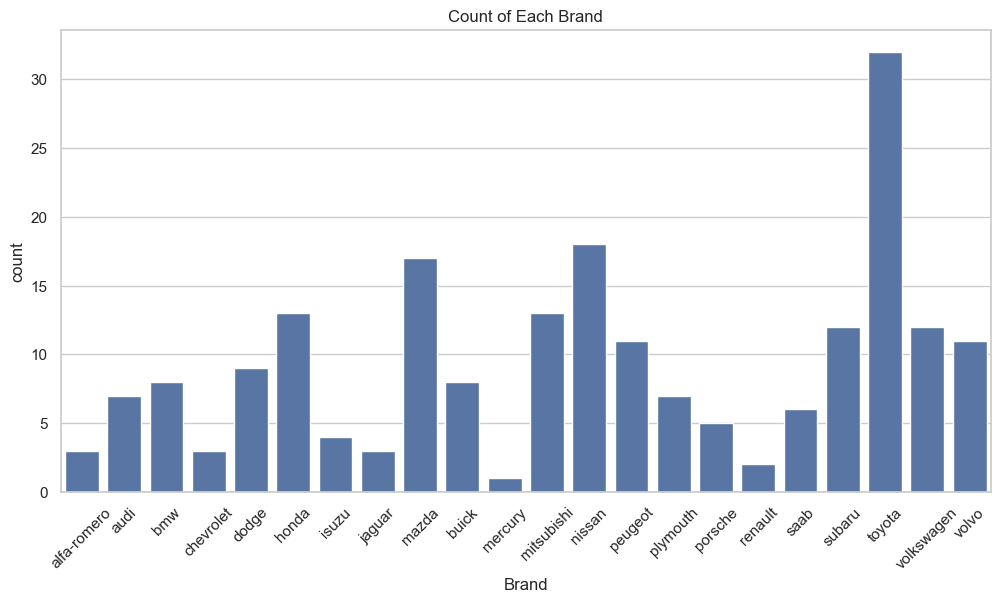

In [831]:
# Assuming 'brand_name' is your original brand column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Brand')  # Adjust for your actual column
plt.title('Count of Each Brand')
plt.xticks(rotation=45)
plt.show()


In [833]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

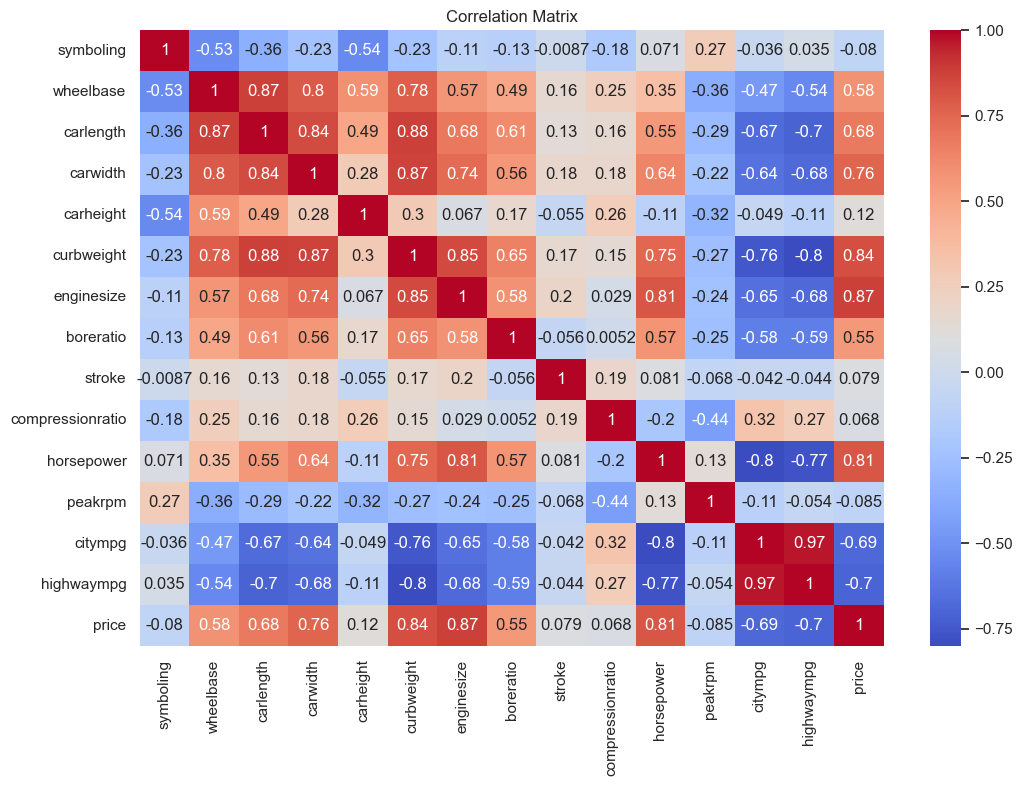

In [821]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [835]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Brand               0
Model               2
dtype: int64

In [837]:
df.shape

(205, 26)

## Outliers treatment


#### IQR


In [839]:
# Function to get outliers using IQR method and filter out outliers or trim
def get_IQR_outliers(df, column, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask =  (df[column] < lower_bound) | (df[column] > upper_bound)
    if filter:                    # if the filter is true
        return df[~outliers_mask] # return outlier filtered dataframe
    else:                         # if the filter is false
        return df[outliers_mask]  # return dataframe of outliers




# Zscore

In [841]:
# Function to get outliers using Zscore method and filter out outliers or trim
def get_zscore_outliers(df, column, threshold=3, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    x = df[column]                             # Extract the specified column from the DataFrame
    mean = x.mean()                            # Calculate the mean of the column
    standard_deviation = x.std()               # Calculate the standard deviation of the column
    z_scores = (x - mean) / standard_deviation # Calculate Z-scores for each value in the column
    outliers_mask = ((z_scores < -1* threshold) | (z_scores > threshold))
    if filter:                                 # if filter is True
        return df[~outliers_mask]              # return outlier filtered dataframe
    else:                                      # if filter is false
        return df[outliers_mask]               # return outlier dataframe

## Outlier treatment of each column in the data set.

Trim outliers with IQR method on columns person_age, person_income, and person_emp_length because we found unrealistic impossible data

In [845]:
tdf = df.copy()
columns = ['wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'] 
for column in columns:
    print(f"Outliers in {column} : {len(get_IQR_outliers(df=tdf, column=column, filter=False))}")
    tdf = get_IQR_outliers(df=tdf, column=column, filter=True)
    print(f"Shape after trimming {tdf.shape}")
tdf.shape

Outliers in wheelbase : 3
Shape after trimming (202, 26)
Outliers in carlength : 1
Shape after trimming (201, 26)
Outliers in carwidth : 11
Shape after trimming (190, 26)
Outliers in carheight : 0
Shape after trimming (190, 26)
Outliers in curbweight : 2
Shape after trimming (188, 26)
Outliers in enginesize : 2
Shape after trimming (186, 26)
Outliers in boreratio : 0
Shape after trimming (186, 26)
Outliers in stroke : 22
Shape after trimming (164, 26)
Outliers in compressionratio : 28
Shape after trimming (136, 26)
Outliers in horsepower : 3
Shape after trimming (133, 26)
Outliers in peakrpm : 6
Shape after trimming (127, 26)
Outliers in citympg : 1
Shape after trimming (126, 26)
Outliers in highwaympg : 0
Shape after trimming (126, 26)


(126, 26)

In [848]:
tdf.shape                                                     # outlier trimmed dataframe


(126, 26)

# Visualization after outlier trim and dropping duplicates

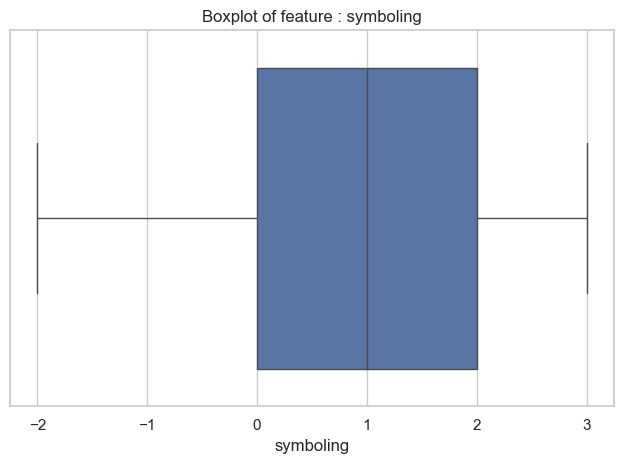

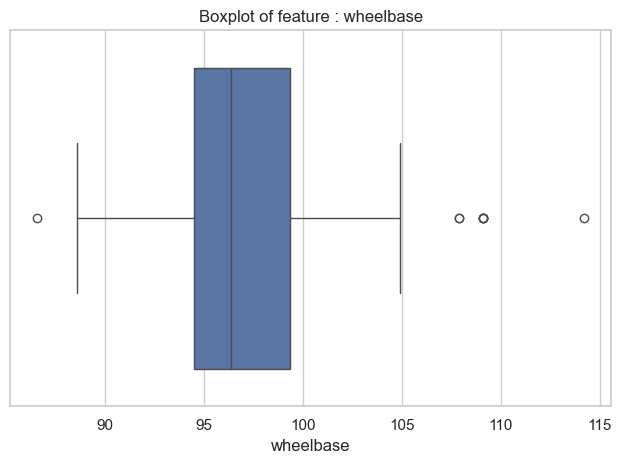

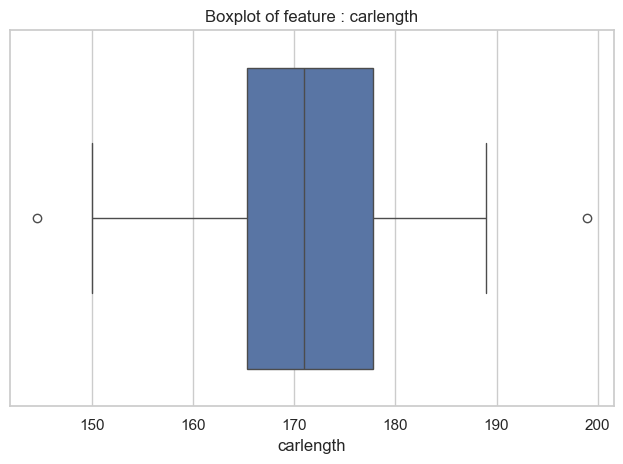

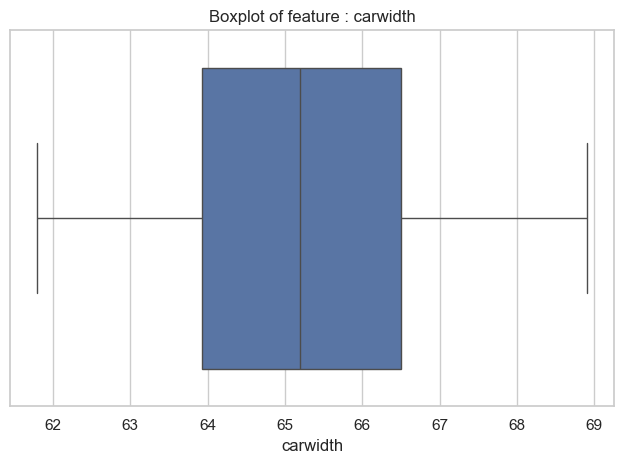

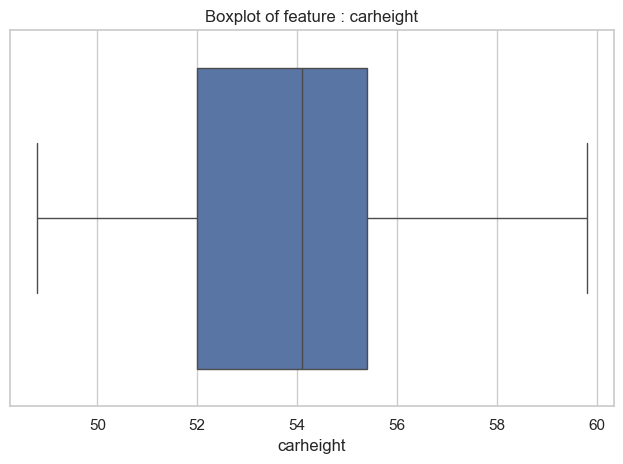

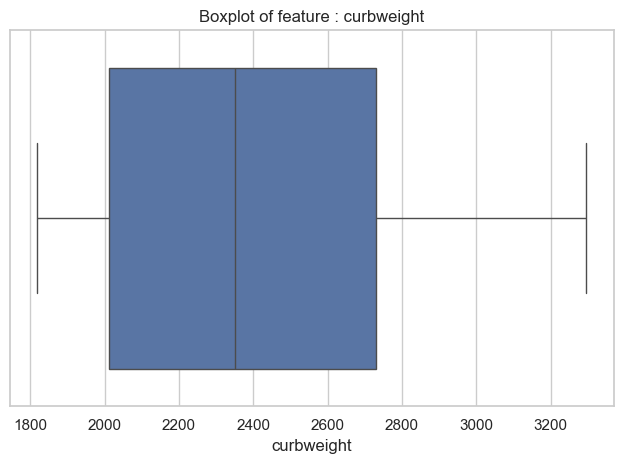

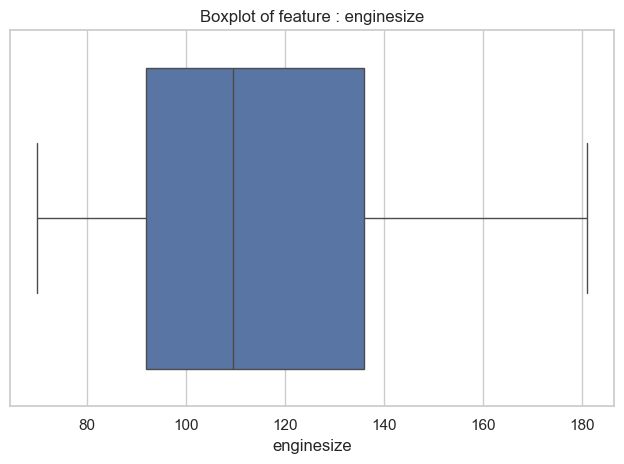

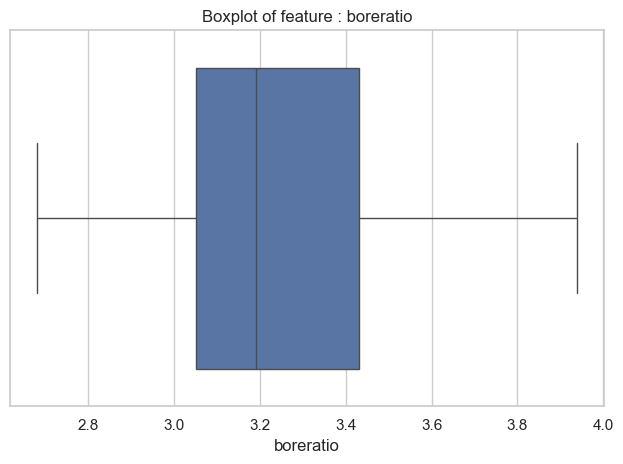

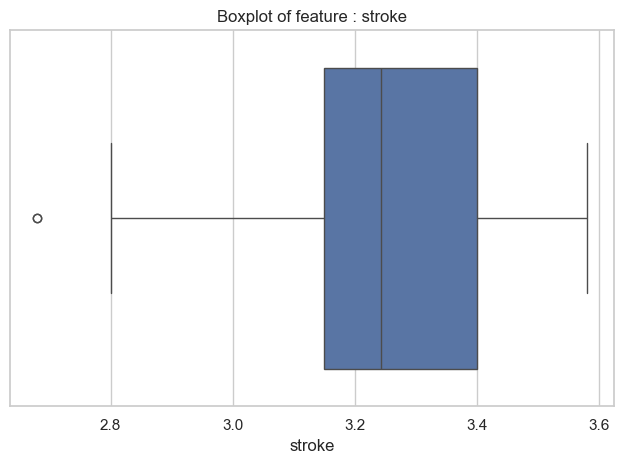

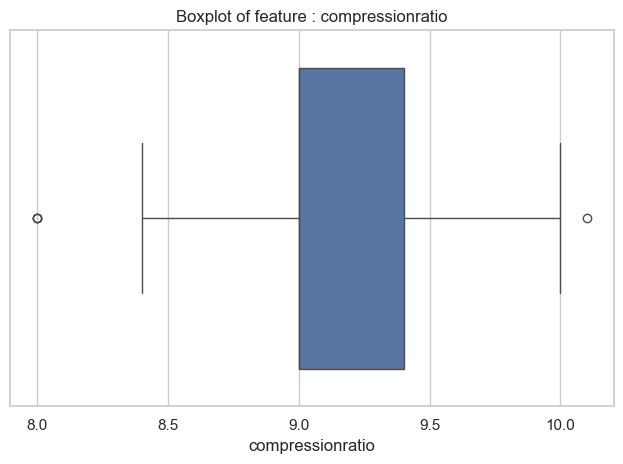

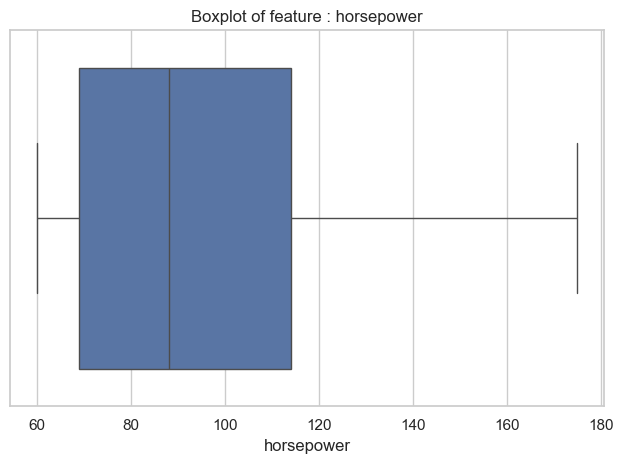

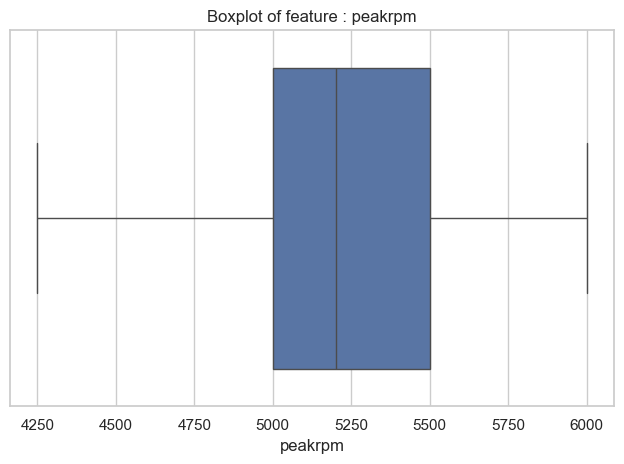

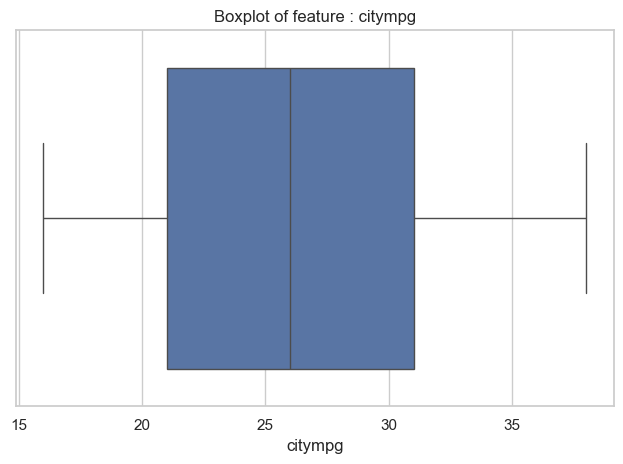

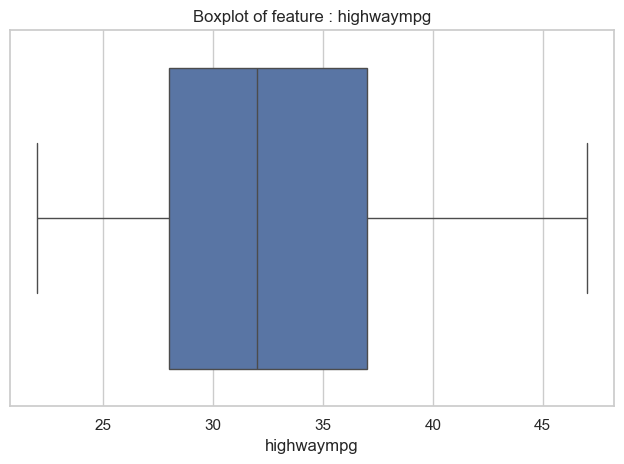

In [850]:
# Outlier detection using boxplot after outlier trim and dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    if column == "price":
        continue
    sns.boxplot(data=tdf, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

#Almost outliers are removed from the columns

In [852]:
tdf.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.936508   97.554762  171.507937   65.271429   53.657143   
std      1.184878    4.539967   10.699769    1.534607    2.420725   
min     -2.000000   86.600000  144.600000   61.800000   48.800000   
25%      0.000000   94.500000  165.300000   63.925000   52.000000   
50%      1.000000   96.400000  170.950000   65.200000   54.100000   
75%      2.000000   99.350000  177.800000   66.500000   55.400000   
max      3.000000  114.200000  198.900000   68.900000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   126.000000  126.000000  126.000000  126.000000        126.000000   
mean   2406.634921  115.952381    3.269127    3.250794          9.081905   
std     412.141987   27.264000    0.250768    0.183674          0.389656   
min    1819.000000   70.000000    2.680000    2.680000          8.000000   
25%    2011.250000   92.000000    3.050000    3.150000          9.000000   
50%    2351.000000  109.500000    3.190000    3.242500          9.000000   
75%    2729.000000  136.000000    3.430000    3.400000          9.400000   
max    3296.000000  181.000000    3.940000    3.580000         10.100000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  126.000000   126.000000  126.000000  126.000000    126.000000  
mean    95.460317  5239.285714   25.928571   31.777778  10945.230159  
std     29.522236   382.811031    5.669820    5.746497   4586.023107  
min     60.000000  4250.000000   16.000000   22.000000   5195.000000  
25%     69.000000  5000.000000   21.000000   28.000000   7295.000000  
50%     88.000000  5200.000000   26.000000   32.000000   9022.000000  
75%    114.000000  5500.000000   31.000000   37.000000  13873.750000  
max    175.000000  6000.000000   38.000000   47.000000  24565.000000

In [854]:
tdf.shape

(126, 26)

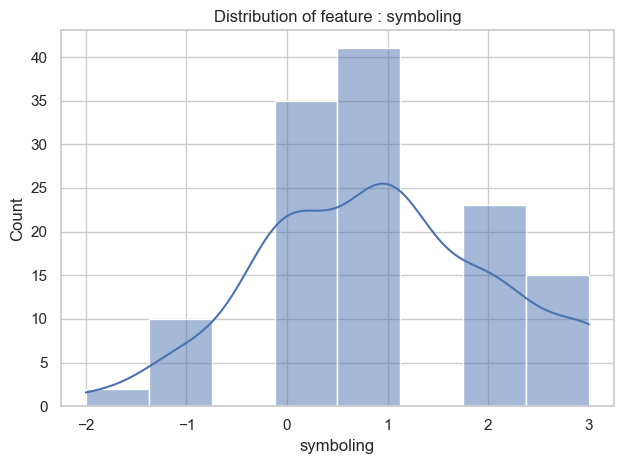

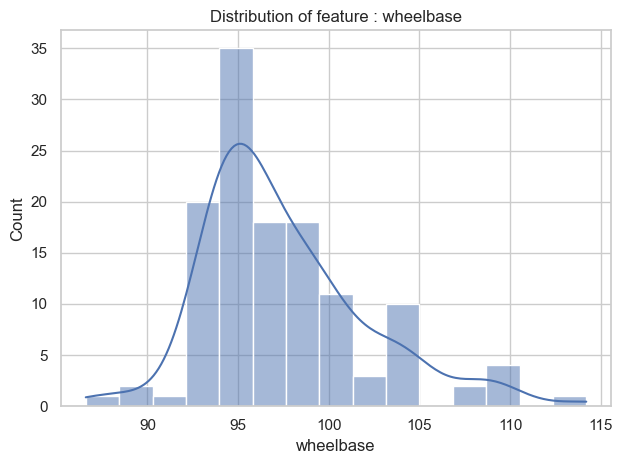

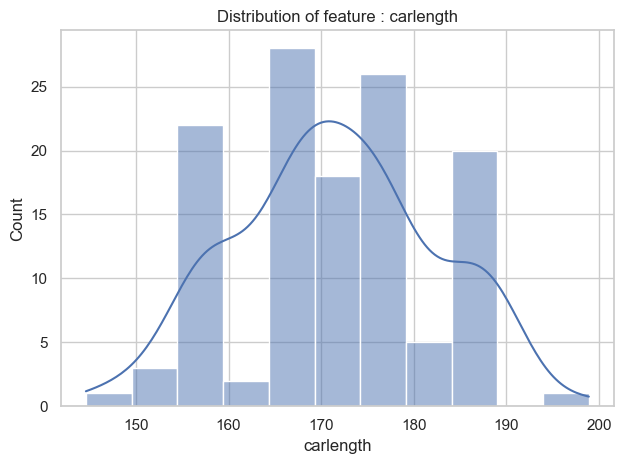

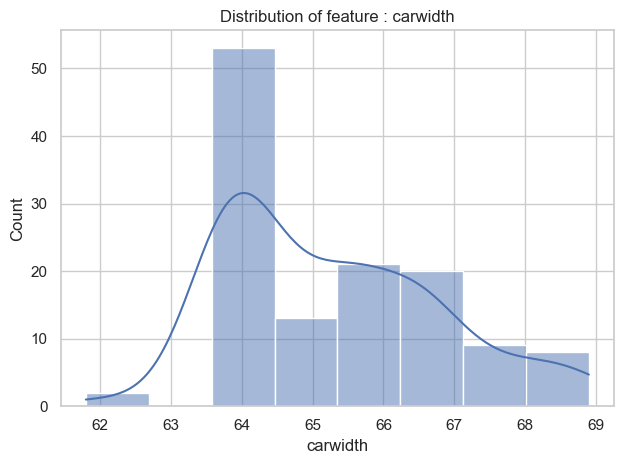

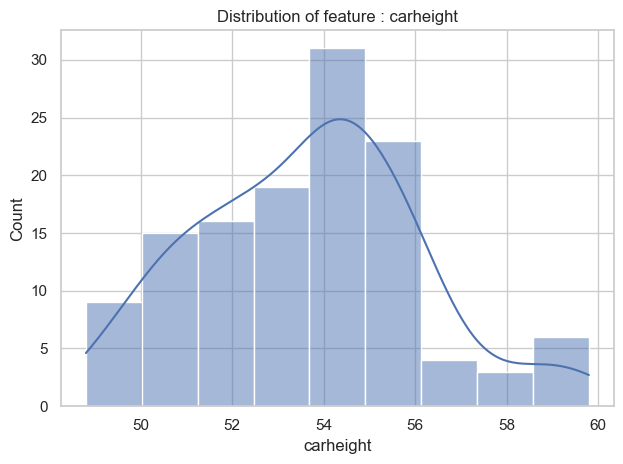

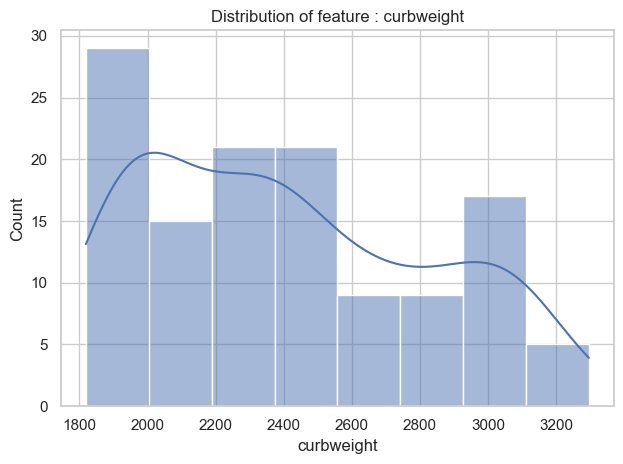

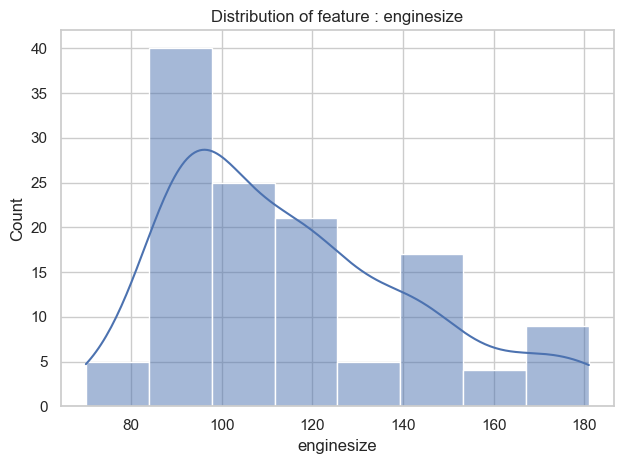

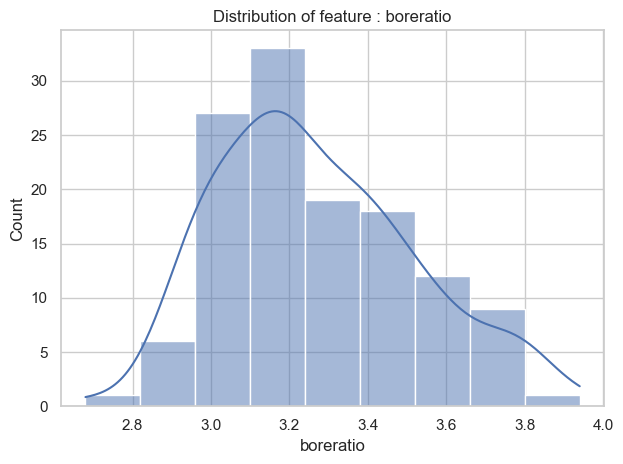

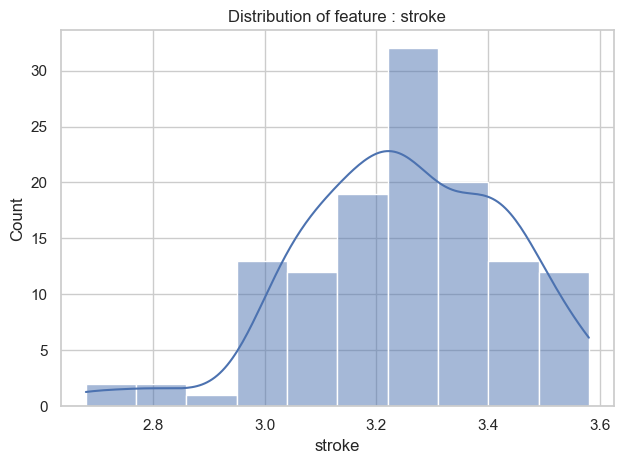

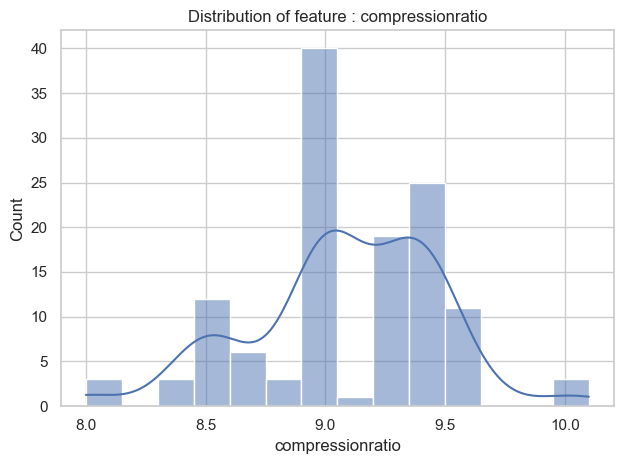

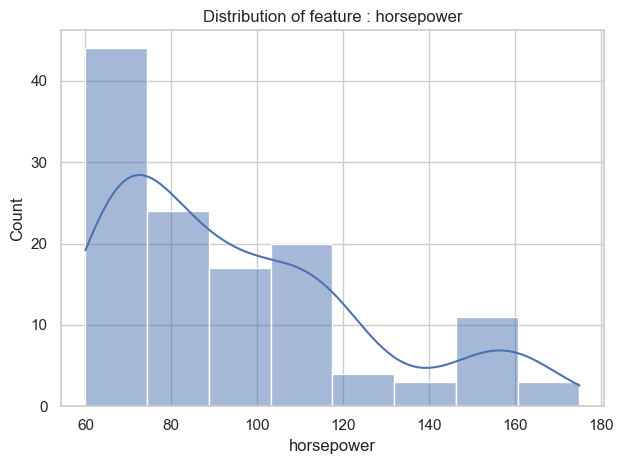

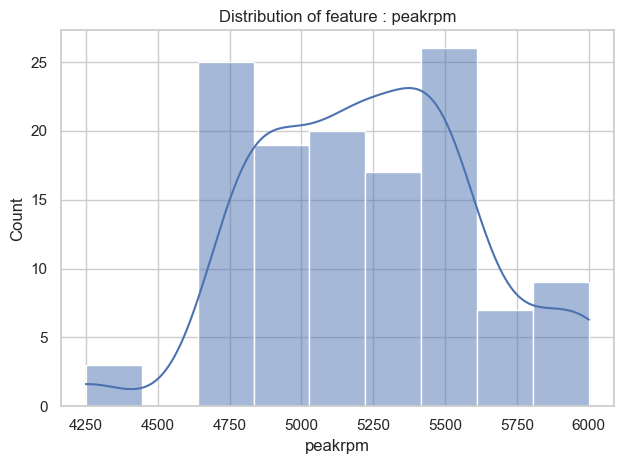

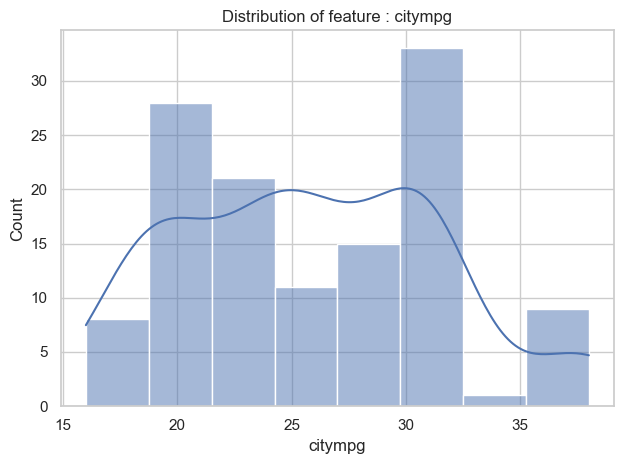

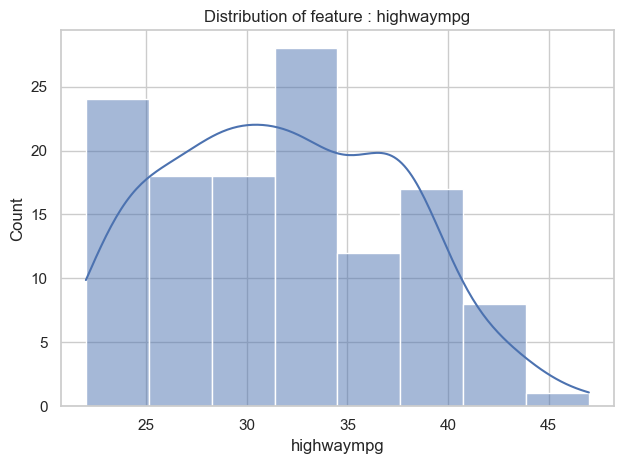

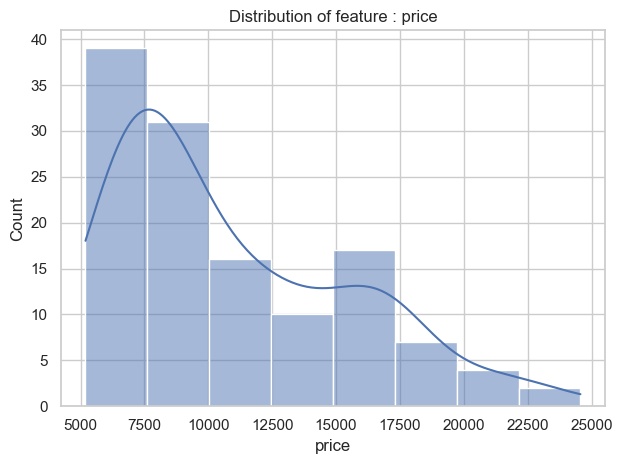

In [856]:
# draw histplot for every numerical column to see distrubution of data after outlier trim dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    sns.histplot(data=tdf, x=column, kde=True)
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

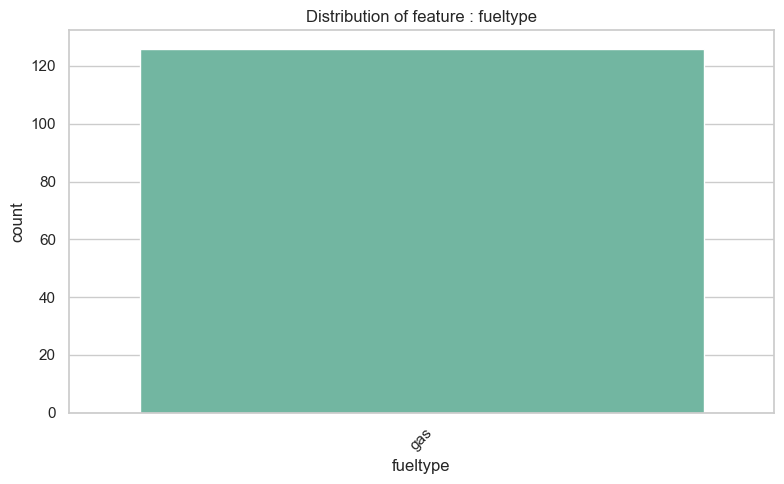

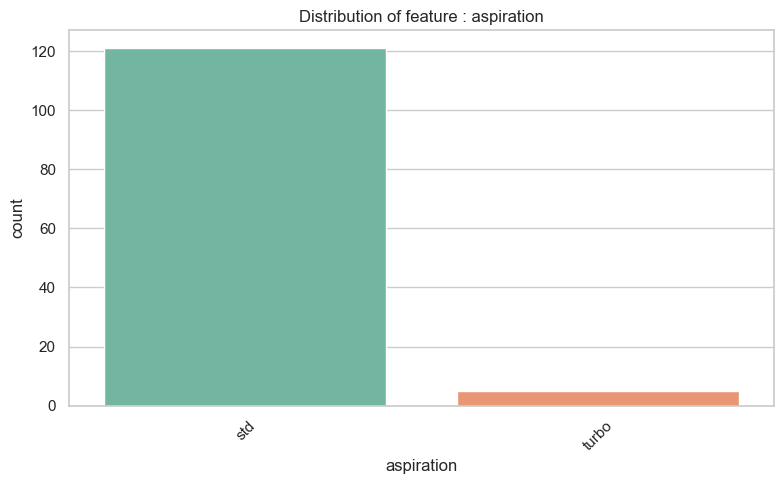

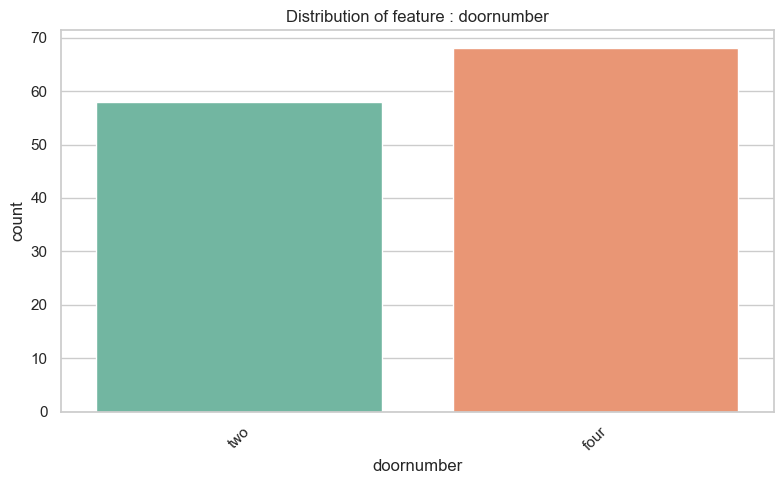

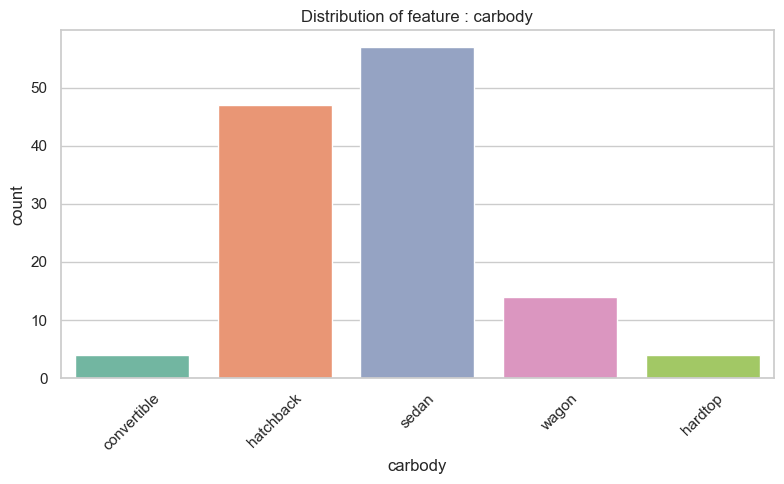

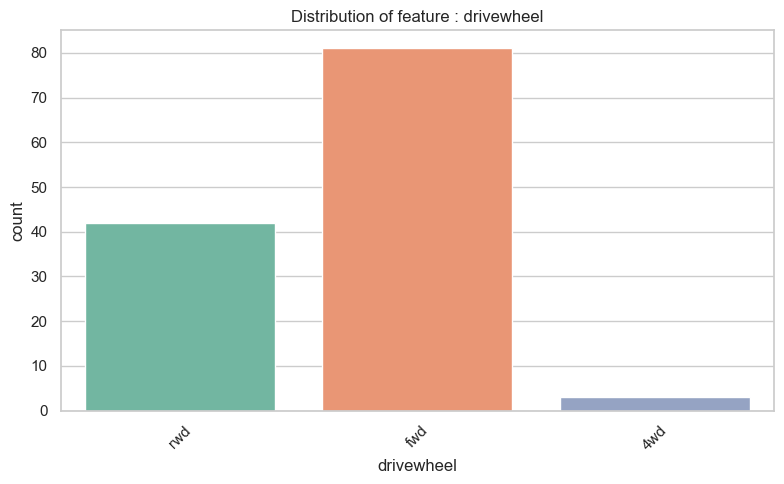

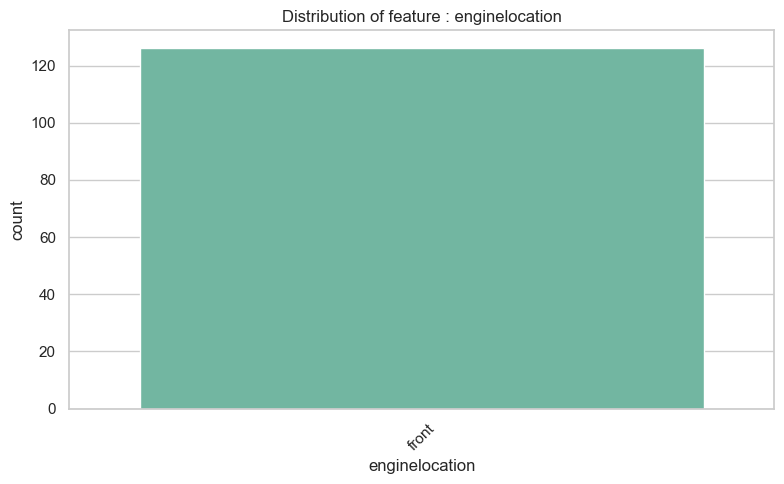

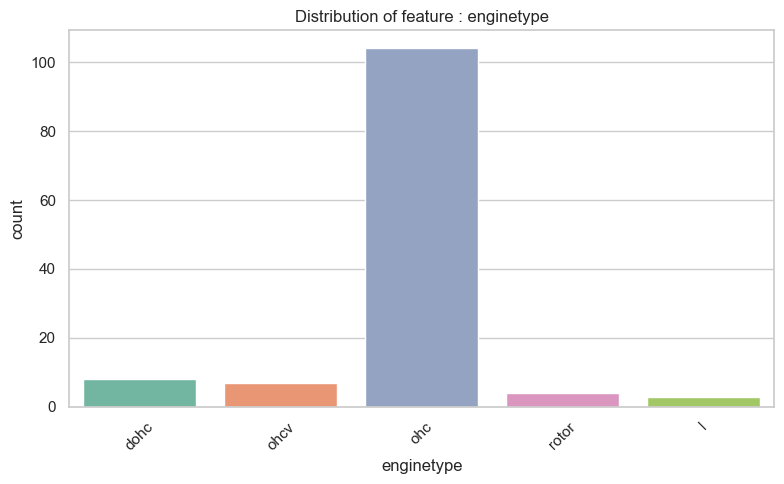

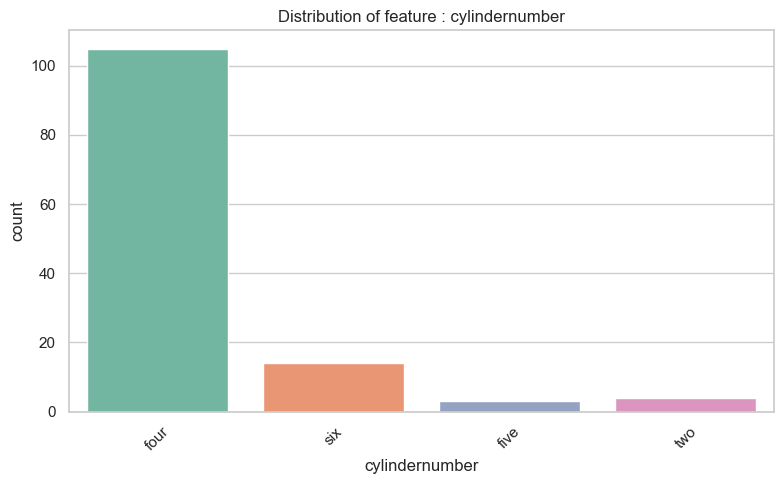

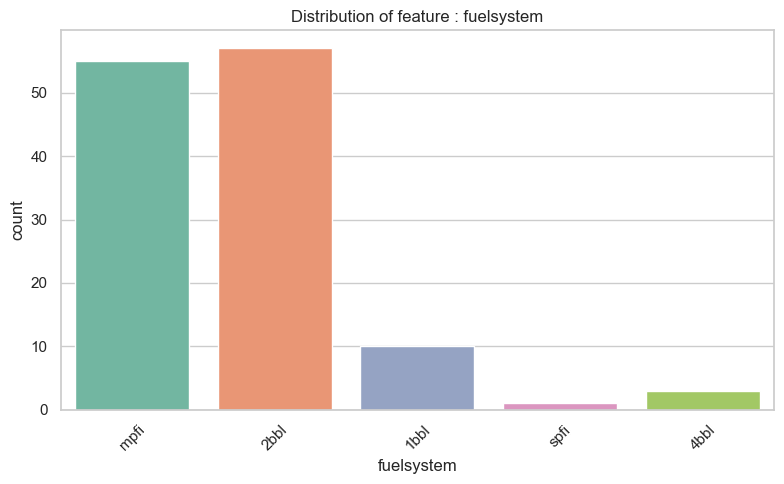

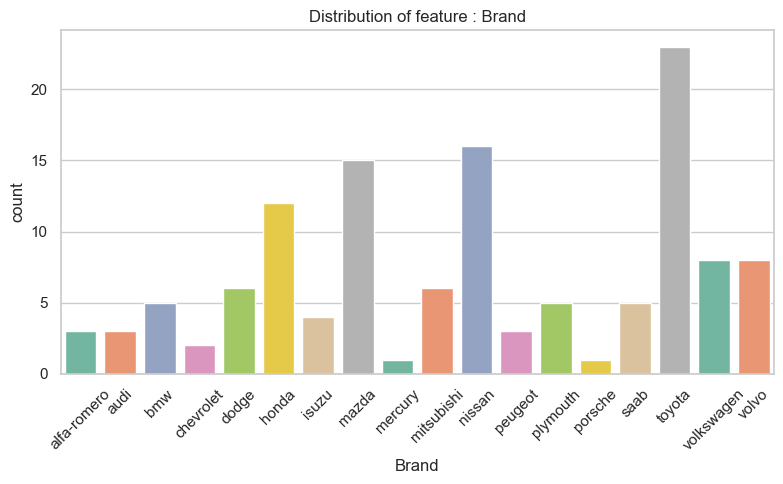

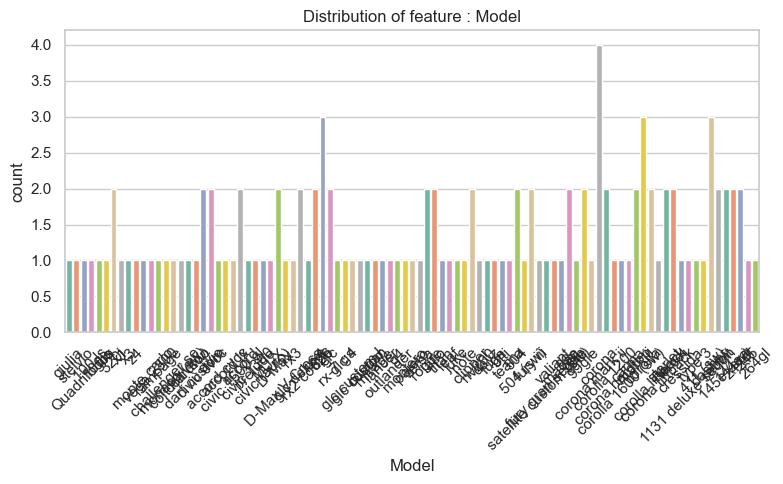

In [857]:
wr.filterwarnings("ignore")

#draw count plot to see distribution of categorical data after outlier trim and dropping duplicates
for column in tdf.select_dtypes(include="object").columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=tdf, x=column, hue = column, palette="Set2")
    plt.title(f"Distribution of feature : {column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

# One Hot Encoding

In [860]:
tdf.reset_index(drop=True, inplace=True) # reset df index

In [862]:
columns = ['Brand', 'fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber'] # define categorical columns
df = pd.get_dummies(df, drop_first=True)

In [864]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle categorical variables with one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better performance of some regression models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [866]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocess numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_cols])
encoder = OneHotEncoder()
X_categorical = encoder.fit_transform(X[categorical_cols]).toarray()  # Convert to array

In [868]:
# Combine processed numerical and categorical features

X_processed = np.hstack((X_numerical, X_categorical))
X_processed
X_processed = pd.DataFrame(X_processed)  # Replace with your actual feature names

#  Feature Importance Analysis

In [870]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importances
print(feature_importances)



           Feature  Importance
6       enginesize    0.564859
5       curbweight    0.248346
13      highwaympg    0.067059
10      horsepower    0.037869
3         carwidth    0.011874
..             ...         ...
163    Model_nv200    0.000000
162     Model_note    0.000000
148   Model_impala    0.000000
149     Model_juke    0.000000
102  Model_century    0.000000

[204 rows x 2 columns]


In [872]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
X_label=pd.get_dummies(X,drop_first=True)
# Assume X_encoded is your original feature matrix (before selecting) and y is your target variable (car prices)
# Fit Lasso model
lasso = Lasso(alpha=0.1)  #alpha is adjustable
lasso.fit(X_label, y)

# Get the coefficients and feature names from the original features
coefficients = lasso.coef_
feature_names = np.array(X_label.columns)  # Get the original feature names

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Keep only significant features which is non-zero coefficients
importance_df = importance_df[importance_df['Coefficient'] != 0]

# Sort by absolute value of coefficients
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Here we are showing the top 10 most significant features
top_features = importance_df.head(10)

print(top_features[['Feature', 'Coefficient']])


                             Feature   Coefficient
23               enginelocation_rear  17644.819212
14                      fueltype_gas -13929.049658
44                         Brand_bmw  13105.203811
199                         Model_x5  11356.684094
175  Model_regal sport coupe (turbo)   9197.429458
74                        Model_320i  -8427.329105
57                     Brand_porsche   5888.526584
33              cylindernumber_three   5454.377882
98                      Model_carina  -5284.729181
55                     Brand_peugeot  -4830.634528


In [874]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha as necessary
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [876]:
# Get the coefficients
coefficients = lasso.coef_

# Create a DataFrame to display features and their coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Filter to show only selected features (non-zero coefficients)
selected_features = feature_importance[feature_importance['Coefficient'] != 0]

print("Selected Features using Lasso:")
print(selected_features)


Selected Features using Lasso:
       Feature  Coefficient
0    symboling   522.639573
1    wheelbase   154.705365
2    carlength  -209.027947
3     carwidth   650.258852
4    carheight  -361.236246
..         ...          ...
196   Model_x1  2138.088138
197   Model_x3  1407.187034
200   Model_xf  2316.643288
201   Model_xj  -950.569319
202   Model_xk  1323.047542

[162 rows x 2 columns]


# Scaling

In [878]:
from sklearn.preprocessing import StandardScaler


# Scale the selected features using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)



# Train the model
Model Implementation


 Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor


1) Linear Regression


In [880]:
# Dictionary to hold models and their names
models = {
    "Linear Regr": LinearRegression(),
    "Lasso Regr": Lasso(alpha=0.1),  # You can tune alpha as necessary
    "Decision Tree Regr": DecisionTreeRegressor(),
    "Random Forest Regr": RandomForestRegressor(),
    "Gradient Boosting Regr": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

# List to store the results
results = []

# Loop through each model, fit, predict, and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the list
    results.append({"Model": model_name, "MSE": mse, "MAE": mae, "R-squared": r2})


## Model Evaluation
Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).



In [883]:
# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Model Comparison:")
print(results_df)

Model Comparison:
                      Model           MSE          MAE  R-squared
0               Linear Regr  1.004686e+07  2432.334211   0.872734
1                Lasso Regr  1.004734e+07  2432.405351   0.872728
2        Decision Tree Regr  7.948155e+06  1858.973585   0.899319
3        Random Forest Regr  3.321494e+06  1247.367762   0.957926
4    Gradient Boosting Regr  5.929505e+06  1699.770092   0.924890
5  Support Vector Regressor  8.672283e+07  5686.944101  -0.098536


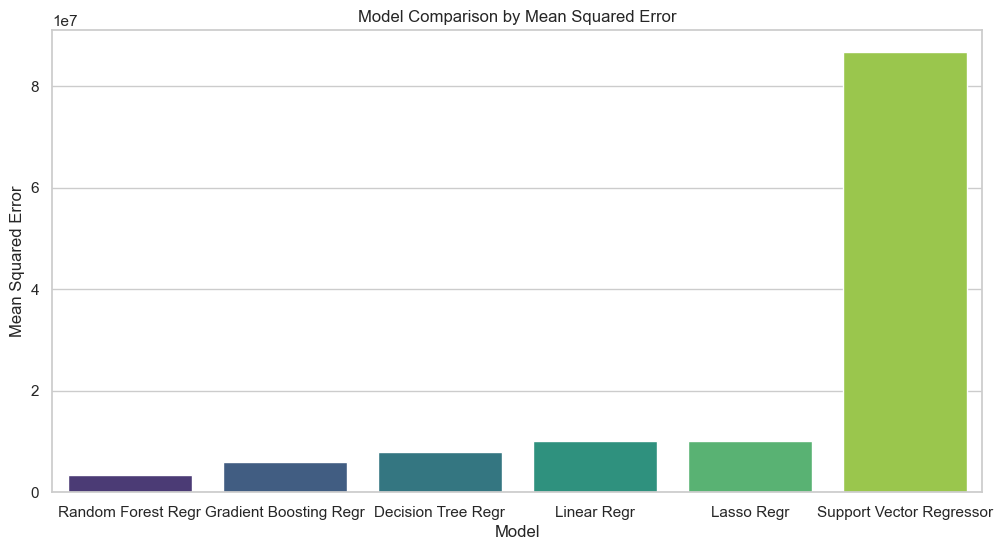

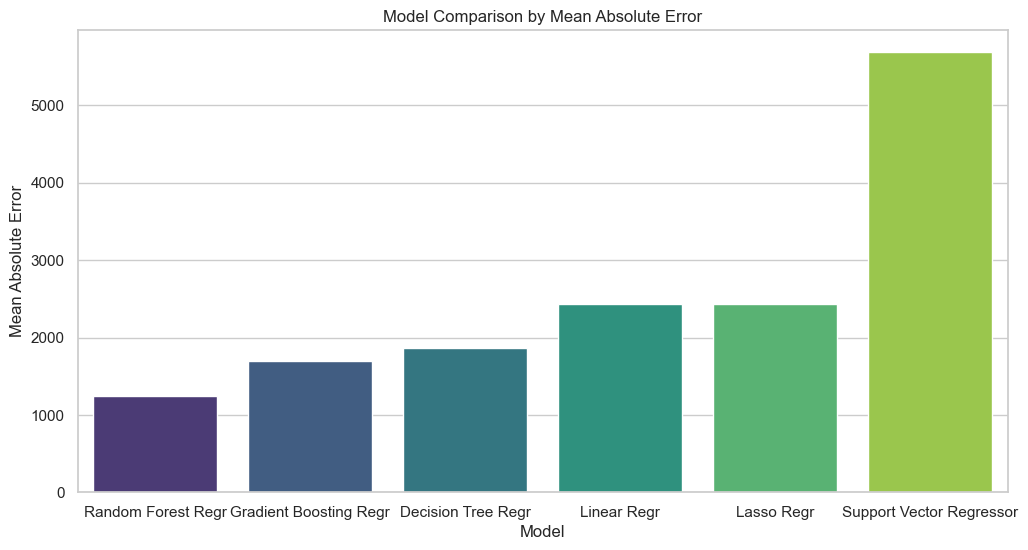

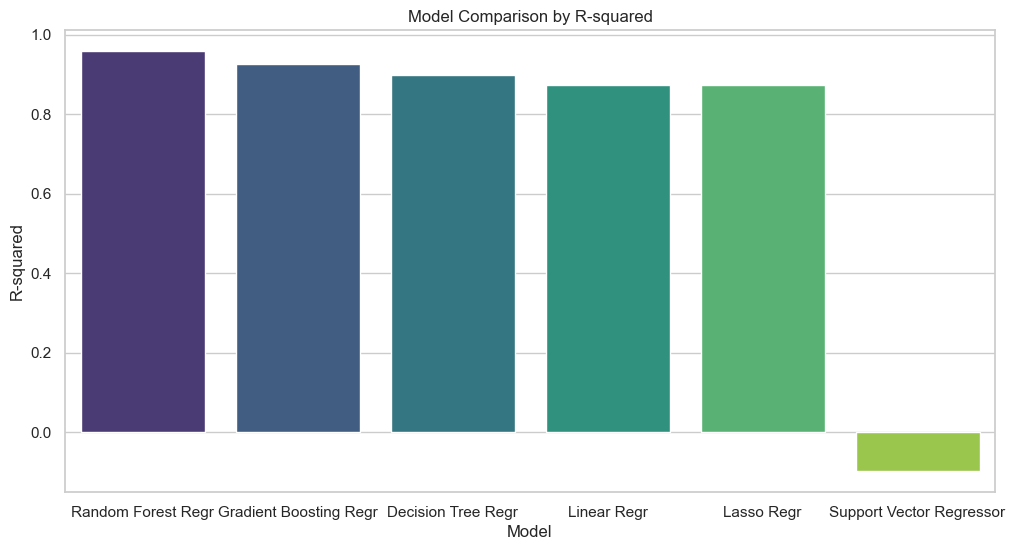

In [885]:
# Set the style of seaborn for visualization
sns.set(style="whitegrid")

# Create a bar plot for MSE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', data=results_df.sort_values(by='MSE', ascending=True), palette='viridis')
plt.title('Model Comparison by Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.show()

# Create a bar plot for MSE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=results_df.sort_values(by='MAE', ascending=True), palette='viridis')
plt.title('Model Comparison by Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model')
plt.show()

# Create a bar plot for R-squared
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R-squared', data=results_df.sort_values(by='R-squared', ascending=False), palette='viridis')
plt.title('Model Comparison by R-squared')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.show()

Random Forest Regressor is the best-performing model,The Support Vector Regressor (SVR) performed poorly on this dataset

## Hyperparameter Tuning

In [891]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, n_jobs=-1, verbose=2)
# Fit the model
rf_grid_search.fit(X_train, y_train)

# Best model and evaluation
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Print results
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print(f"R²: {rf_r2:.4f}, MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}")

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert to positive MSE

print("Best Parameters:", best_params)
print("Best MSE from Grid Search:", best_score)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Random Forest Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R²: 0.9006, MSE: 7850798.1112, MAE: 1675.4595
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best MSE from Grid Search: 6288711.571878748


In [ ]:

# Create a new Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = best_rf_model.predict(X_test)

# Calculate metrics
tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_r2 = r2_score(y_test, y_pred_tuned)

# Print the metrics
print("Tuned Mean Squared Error:", tuned_mse)
print("Tuned Mean Absolute Error:", tuned_mae)
print("Tuned R^2 Score:", tuned_r2)


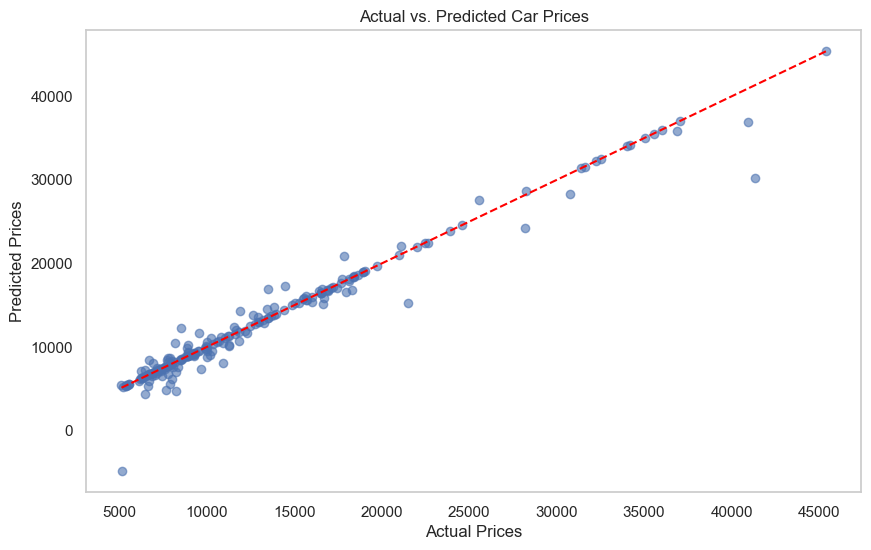

In [895]:
# Assuming have the predictions from your model
predictions = lasso.predict(X_label)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs. Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()

In summary, hyperparameter tuning for a Random Forest model involves systematically testing different configurations of parameters to find the best combination that improves the model's predictive accuracy. By using techniques like grid search and evaluating performance with metrics like MSE and R², we can enhance the model's reliability and effectiveness for predicting outcomes.n.

### Key Insights

#### Feature Importance:
Engine Location: Cars with rear engine locations are associated with higher prices, indicating a potential preference for performance or luxury.

Brand Impact: Certain brands, such as BMW and Porsche, significantly influence pricing, reflecting brand reputation and consumer perception of quality.

Fuel Type: Cars that run on gas are generally priced lower than other fuel types, suggesting a market preference for alternative fuel vehicles, which may carry premium pr positioning in the market.